# Phase 1: Data Exploration & Understanding
**Objective**: Understand the basic structure of input, output, and supplementary data files.


## 1. Setup and Data Loading

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [2]:
# Define file paths
data_train_dir = "/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train"
data_suppl_path = "/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/supplementary_data.csv"

# Define specific file paths for Week 1 (starting small)
input_w01_path = os.path.join(data_train_dir, "input_2023_w01.csv")
output_w01_path = os.path.join(data_train_dir, "output_2023_w01.csv")

# Verify files exist
print("Checking file existence...")
print(f"Input W01 exists: {os.path.exists(input_w01_path)}")
print(f"Output W01 exists: {os.path.exists(output_w01_path)}")
print(f"Supplementary exists: {os.path.exists(data_suppl_path)}")

Checking file existence...
Input W01 exists: True
Output W01 exists: True
Supplementary exists: True


In [3]:
# Load Week 1 data
print("Loading Week 1 data...")
print("This may take a moment...\n")

input_w01 = pd.read_csv(input_w01_path)
print("✓ Input data loaded")

output_w01 = pd.read_csv(output_w01_path)
print("✓ Output data loaded")

supplementary = pd.read_csv(data_suppl_path)
print("✓ Supplementary data loaded\n")

print("All data loaded successfully!")

Loading Week 1 data...
This may take a moment...

✓ Input data loaded
✓ Output data loaded
✓ Supplementary data loaded

All data loaded successfully!


/tmp/ipykernel_161/911761998.py:11: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  supplementary = pd.read_csv(data_suppl_path)


In [4]:
# Display basic info for each dataset
print("=" * 80)
print("INPUT DATA (Week 1) - Before Pass Thrown")
print("=" * 80)
print(f"Shape: {input_w01.shape[0]:,} rows × {input_w01.shape[1]} columns")
print(f"Memory usage: {input_w01.memory_usage(deep=True).sum() / 1024**2:.2f} MB\n")
print("Columns:")
print(input_w01.dtypes)
print("\n" + "=" * 80)

INPUT DATA (Week 1) - Before Pass Thrown
Shape: 285,714 rows × 23 columns
Memory usage: 157.22 MB

Columns:
game_id                       int64
play_id                       int64
player_to_predict              bool
nfl_id                        int64
frame_id                      int64
play_direction               object
absolute_yardline_number      int64
player_name                  object
player_height                object
player_weight                 int64
player_birth_date            object
player_position              object
player_side                  object
player_role                  object
x                           float64
y                           float64
s                           float64
a                           float64
dir                         float64
o                           float64
num_frames_output             int64
ball_land_x                 float64
ball_land_y                 float64
dtype: object



In [5]:
print("=" * 80)
print("OUTPUT DATA (Week 1) - After Pass Thrown")
print("=" * 80)
print(f"Shape: {output_w01.shape[0]:,} rows × {output_w01.shape[1]} columns")
print(f"Memory usage: {output_w01.memory_usage(deep=True).sum() / 1024**2:.2f} MB\n")
print("Columns:")
print(output_w01.dtypes)
print("\n" + "=" * 80)

OUTPUT DATA (Week 1) - After Pass Thrown
Shape: 32,088 rows × 6 columns
Memory usage: 1.47 MB

Columns:
game_id       int64
play_id       int64
nfl_id        int64
frame_id      int64
x           float64
y           float64
dtype: object



In [6]:
print("=" * 80)
print("SUPPLEMENTARY DATA - Contextual Information")
print("=" * 80)
print(f"Shape: {supplementary.shape[0]:,} rows × {supplementary.shape[1]} columns")
print(f"Memory usage: {supplementary.memory_usage(deep=True).sum() / 1024**2:.2f} MB\n")
print("Columns:")
print(supplementary.dtypes)
print("\n" + "=" * 80)

SUPPLEMENTARY DATA - Contextual Information
Shape: 18,009 rows × 41 columns
Memory usage: 24.57 MB

Columns:
game_id                                    int64
season                                     int64
week                                       int64
game_date                                 object
game_time_eastern                         object
home_team_abbr                            object
visitor_team_abbr                         object
play_id                                    int64
play_description                          object
quarter                                    int64
game_clock                                object
down                                       int64
yards_to_go                                int64
possession_team                           object
defensive_team                            object
yardline_side                             object
yardline_number                            int64
pre_snap_home_score                        int64
pre_snap_

### 2.2 Unique Identifier Analysis

Understanding the granularity of each dataset and how they relate.

In [7]:
# Analyze INPUT data granularity
print("=" * 80)
print("INPUT DATA - Granularity Analysis")
print("=" * 80)

print(f"Unique game_ids: {input_w01['game_id'].nunique()}")
print(f"Unique (game_id, play_id) combinations: {input_w01.groupby(['game_id', 'play_id']).ngroups}")
print(f"Unique (game_id, play_id, nfl_id) combinations: {input_w01.groupby(['game_id', 'play_id', 'nfl_id']).ngroups}")

# Calculate averages
avg_players_per_play = input_w01.groupby(['game_id', 'play_id'])['nfl_id'].nunique().mean()
avg_frames_per_play = input_w01.groupby(['game_id', 'play_id'])['frame_id'].nunique().mean()
avg_frames_per_player = input_w01.groupby(['game_id', 'play_id', 'nfl_id'])['frame_id'].nunique().mean()

print(f"\nAverage players tracked per play: {avg_players_per_play:.1f}")
print(f"Average frames per play: {avg_frames_per_play:.1f}")
print(f"Average frames per player per play: {avg_frames_per_player:.1f}")

print("\n" + "=" * 80)

INPUT DATA - Granularity Analysis
Unique game_ids: 16
Unique (game_id, play_id) combinations: 819
Unique (game_id, play_id, nfl_id) combinations: 10089

Average players tracked per play: 12.3
Average frames per play: 28.3
Average frames per player per play: 28.3



In [8]:
# Analyze OUTPUT data granularity
print("=" * 80)
print("OUTPUT DATA - Granularity Analysis")
print("=" * 80)

print(f"Unique game_ids: {output_w01['game_id'].nunique()}")
print(f"Unique (game_id, play_id) combinations: {output_w01.groupby(['game_id', 'play_id']).ngroups}")
print(f"Unique (game_id, play_id, nfl_id) combinations: {output_w01.groupby(['game_id', 'play_id', 'nfl_id']).ngroups}")

# Calculate averages
avg_players_per_play_out = output_w01.groupby(['game_id', 'play_id'])['nfl_id'].nunique().mean()
avg_frames_per_play_out = output_w01.groupby(['game_id', 'play_id'])['frame_id'].nunique().mean()
avg_frames_per_player_out = output_w01.groupby(['game_id', 'play_id', 'nfl_id'])['frame_id'].nunique().mean()

print(f"\nAverage players tracked per play: {avg_players_per_play_out:.1f}")
print(f"Average frames per play: {avg_frames_per_play_out:.1f}")
print(f"Average frames per player per play: {avg_frames_per_player_out:.1f}")

print("\n" + "=" * 80)

OUTPUT DATA - Granularity Analysis
Unique game_ids: 16
Unique (game_id, play_id) combinations: 819
Unique (game_id, play_id, nfl_id) combinations: 2679

Average players tracked per play: 3.3
Average frames per play: 11.1
Average frames per player per play: 12.0



In [9]:
# Analyze SUPPLEMENTARY data granularity
print("=" * 80)
print("SUPPLEMENTARY DATA - Granularity Analysis")
print("=" * 80)

print(f"Unique game_ids: {supplementary['game_id'].nunique()}")
print(f"Unique (game_id, play_id) combinations: {supplementary.groupby(['game_id', 'play_id']).ngroups}")
print(f"\nTotal rows: {len(supplementary):,}")
print(f"Unique plays: {supplementary.groupby(['game_id', 'play_id']).ngroups:,}")

# Check if one row per play
rows_per_play = supplementary.groupby(['game_id', 'play_id']).size()
print(f"\nRows per play - Min: {rows_per_play.min()}, Max: {rows_per_play.max()}, Mean: {rows_per_play.mean():.2f}")

if rows_per_play.max() == 1:
    print("✓ Supplementary data has ONE ROW PER PLAY (as expected)")
else:
    print("⚠ Supplementary data has MULTIPLE ROWS PER PLAY")

print("\n" + "=" * 80)

SUPPLEMENTARY DATA - Granularity Analysis
Unique game_ids: 349
Unique (game_id, play_id) combinations: 18009

Total rows: 18,009
Unique plays: 18,009

Rows per play - Min: 1, Max: 1, Mean: 1.00
✓ Supplementary data has ONE ROW PER PLAY (as expected)



## 3. Week 1 Deep Dive

Examining one specific play in detail across all three datasets.

### 3.1 Single Play Examination

In [10]:
# Select a single play to examine
# Pick the first game_id and play_id from input data
sample_game_id = input_w01['game_id'].iloc[0]
sample_play_id = input_w01['play_id'].iloc[0]

print("=" * 80)
print(f"EXAMINING PLAY: game_id={sample_game_id}, play_id={sample_play_id}")
print("=" * 80)

EXAMINING PLAY: game_id=2023090700, play_id=101


In [11]:
# Filter INPUT data for this play
sample_input = input_w01[(input_w01['game_id'] == sample_game_id) & 
                          (input_w01['play_id'] == sample_play_id)].copy()

print("\n" + "-" * 80)
print("INPUT DATA for this play:")
print("-" * 80)
print(f"Total rows: {len(sample_input)}")
print(f"Unique players (nfl_id): {sample_input['nfl_id'].nunique()}")
print(f"Frame range: {sample_input['frame_id'].min()} to {sample_input['frame_id'].max()}")
print(f"Total frames: {sample_input['frame_id'].nunique()}")

# Check num_frames_output
num_frames_output = sample_input['num_frames_output'].iloc[0]
print(f"\nnum_frames_output value: {num_frames_output}")

# Show player roles
print("\nPlayer roles in this play:")
player_roles = sample_input.groupby(['nfl_id', 'player_name', 'player_position', 
                                      'player_side', 'player_role']).size().reset_index(name='frame_count')
print(player_roles.to_string(index=False))


--------------------------------------------------------------------------------
INPUT DATA for this play:
--------------------------------------------------------------------------------
Total rows: 234
Unique players (nfl_id): 9
Frame range: 1 to 26
Total frames: 26

num_frames_output value: 21

Player roles in this play:
 nfl_id       player_name player_position player_side        player_role  frame_count
  43290        Jared Goff              QB     Offense             Passer           26
  44930     Josh Reynolds              WR     Offense  Targeted Receiver           26
  46137       Justin Reid              SS     Defense Defensive Coverage           26
  52546    L'Jarius Sneed              CB     Defense Defensive Coverage           26
  53487       Nick Bolton             MLB     Defense Defensive Coverage           26
  53541 Amon-Ra St. Brown              WR     Offense Other Route Runner           26
  53959      Brock Wright              TE     Offense Other Route Runne

In [12]:
# Filter OUTPUT data for this play
sample_output = output_w01[(output_w01['game_id'] == sample_game_id) & 
                            (output_w01['play_id'] == sample_play_id)].copy()

print("\n" + "-" * 80)
print("OUTPUT DATA for this play:")
print("-" * 80)
print(f"Total rows: {len(sample_output)}")
print(f"Unique players (nfl_id): {sample_output['nfl_id'].nunique()}")
print(f"Frame range: {sample_output['frame_id'].min()} to {sample_output['frame_id'].max()}")
print(f"Total frames: {sample_output['frame_id'].nunique()}")

print(f"\nComparison: num_frames_output={num_frames_output}, actual max frame_id={sample_output['frame_id'].max()}")

# Check which players are in output
input_players = set(sample_input['nfl_id'].unique())
output_players = set(sample_output['nfl_id'].unique())

print(f"\nPlayers in INPUT: {len(input_players)}")
print(f"Players in OUTPUT: {len(output_players)}")
print(f"Players in both: {len(input_players.intersection(output_players))}")
print(f"Players only in INPUT: {len(input_players - output_players)}")
print(f"Players only in OUTPUT: {len(output_players - input_players)}")


--------------------------------------------------------------------------------
OUTPUT DATA for this play:
--------------------------------------------------------------------------------
Total rows: 63
Unique players (nfl_id): 3
Frame range: 1 to 21
Total frames: 21

Comparison: num_frames_output=21, actual max frame_id=21

Players in INPUT: 9
Players in OUTPUT: 3
Players in both: 3
Players only in INPUT: 6
Players only in OUTPUT: 0


In [13]:
# Filter SUPPLEMENTARY data for this play
sample_suppl = supplementary[(supplementary['game_id'] == sample_game_id) & 
                              (supplementary['play_id'] == sample_play_id)].copy()

print("\n" + "-" * 80)
print("SUPPLEMENTARY DATA for this play:")
print("-" * 80)
print(f"Total rows: {len(sample_suppl)}")

if len(sample_suppl) > 0:
    print("\nPlay context:")
    # Display key fields
    key_fields = ['play_description', 'quarter', 'down', 'yards_to_go', 
                  'pass_result', 'pass_length', 'offense_formation', 
                  'route_of_targeted_receiver', 'team_coverage_type']
    
    for field in key_fields:
        if field in sample_suppl.columns:
            value = sample_suppl[field].iloc[0]
            print(f"  {field}: {value}")
else:
    print("⚠ No supplementary data found for this play")


--------------------------------------------------------------------------------
SUPPLEMENTARY DATA for this play:
--------------------------------------------------------------------------------
Total rows: 1

Play context:
  play_description: (14:25) (Shotgun) J.Goff pass incomplete deep right to J.Reynolds.
  quarter: 1
  down: 3
  yards_to_go: 3
  pass_result: I
  pass_length: 22
  offense_formation: SHOTGUN
  route_of_targeted_receiver: CORNER
  team_coverage_type: COVER_2_ZONE


In [14]:
# Display first few rows of input data for this play
print("\n" + "-" * 80)
print("First 5 rows of INPUT data (selected columns):")
print("-" * 80)
cols_to_show = ['frame_id', 'nfl_id', 'player_name', 'player_role', 
                'x', 'y', 's', 'a', 'ball_land_x', 'ball_land_y']
print(sample_input[cols_to_show].head())


--------------------------------------------------------------------------------
First 5 rows of INPUT data (selected columns):
--------------------------------------------------------------------------------
   frame_id  nfl_id player_name         player_role      x      y     s     a  \
0         1   54527  Bryan Cook  Defensive Coverage  52.33  36.94  0.09  0.39   
1         2   54527  Bryan Cook  Defensive Coverage  52.33  36.94  0.04  0.61   
2         3   54527  Bryan Cook  Defensive Coverage  52.33  36.93  0.12  0.73   
3         4   54527  Bryan Cook  Defensive Coverage  52.35  36.92  0.23  0.81   
4         5   54527  Bryan Cook  Defensive Coverage  52.37  36.90  0.35  0.82   

   ball_land_x  ball_land_y  
0    63.259998        -0.22  
1    63.259998        -0.22  
2    63.259998        -0.22  
3    63.259998        -0.22  
4    63.259998        -0.22  


In [15]:
# Display first few rows of output data for this play
print("\n" + "-" * 80)
print("First 5 rows of OUTPUT data (all columns):")
print("-" * 80)
print(sample_output.head())


--------------------------------------------------------------------------------
First 5 rows of OUTPUT data (all columns):
--------------------------------------------------------------------------------
      game_id  play_id  nfl_id  frame_id      x      y
0  2023090700      101   46137         1  56.22  17.28
1  2023090700      101   46137         2  56.63  16.88
2  2023090700      101   46137         3  57.06  16.46
3  2023090700      101   46137         4  57.48  16.02
4  2023090700      101   46137         5  57.91  15.56


### 3.2 Data Quality Check

Checking for missing values and data completeness.

In [16]:
# Missing values in INPUT data
print("=" * 80)
print("INPUT DATA - Missing Values Analysis")
print("=" * 80)

input_missing = input_w01.isnull().sum()
input_missing_pct = (input_missing / len(input_w01) * 100).round(2)

missing_df = pd.DataFrame({
    'Column': input_missing.index,
    'Missing_Count': input_missing.values,
    'Missing_Percent': input_missing_pct.values
}).sort_values('Missing_Count', ascending=False)

# Show only columns with missing values
missing_df_filtered = missing_df[missing_df['Missing_Count'] > 0]

if len(missing_df_filtered) > 0:
    print(missing_df_filtered.to_string(index=False))
else:
    print("✓ No missing values in INPUT data!")

print("\n" + "=" * 80)

INPUT DATA - Missing Values Analysis
✓ No missing values in INPUT data!



In [17]:
# Missing values in OUTPUT data
print("=" * 80)
print("OUTPUT DATA - Missing Values Analysis")
print("=" * 80)

output_missing = output_w01.isnull().sum()
output_missing_pct = (output_missing / len(output_w01) * 100).round(2)

missing_df_out = pd.DataFrame({
    'Column': output_missing.index,
    'Missing_Count': output_missing.values,
    'Missing_Percent': output_missing_pct.values
}).sort_values('Missing_Count', ascending=False)

# Show only columns with missing values
missing_df_out_filtered = missing_df_out[missing_df_out['Missing_Count'] > 0]

if len(missing_df_out_filtered) > 0:
    print(missing_df_out_filtered.to_string(index=False))
else:
    print("✓ No missing values in OUTPUT data!")

print("\n" + "=" * 80)

OUTPUT DATA - Missing Values Analysis
✓ No missing values in OUTPUT data!



In [18]:
# Missing values in SUPPLEMENTARY data
print("=" * 80)
print("SUPPLEMENTARY DATA - Missing Values Analysis")
print("=" * 80)

suppl_missing = supplementary.isnull().sum()
suppl_missing_pct = (suppl_missing / len(supplementary) * 100).round(2)

missing_df_suppl = pd.DataFrame({
    'Column': suppl_missing.index,
    'Missing_Count': suppl_missing.values,
    'Missing_Percent': suppl_missing_pct.values
}).sort_values('Missing_Count', ascending=False)

# Show only columns with missing values
missing_df_suppl_filtered = missing_df_suppl[missing_df_suppl['Missing_Count'] > 0]

if len(missing_df_suppl_filtered) > 0:
    print(missing_df_suppl_filtered.to_string(index=False))
else:
    print("✓ No missing values in SUPPLEMENTARY data!")

print("\n" + "=" * 80)

SUPPLEMENTARY DATA - Missing Values Analysis
                    Column  Missing_Count  Missing_Percent
             penalty_yards          17549            97.45
             yardline_side            251             1.39
        pass_location_type             20             0.11
        team_coverage_type              5             0.03
    team_coverage_man_zone              5             0.03
route_of_targeted_receiver              4             0.02
               play_action              1             0.01
             dropback_type              1             0.01
         dropback_distance              1             0.01



### 3.3 Key Fields Examination

Understanding the distribution and values of important fields.

In [19]:
# Examine player_role distribution in INPUT data
print("=" * 80)
print("INPUT DATA - player_role Distribution")
print("=" * 80)

role_counts = input_w01['player_role'].value_counts()
role_pct = (role_counts / len(input_w01) * 100).round(2)

role_df = pd.DataFrame({
    'Role': role_counts.index,
    'Count': role_counts.values,
    'Percentage': role_pct.values
})

print(role_df.to_string(index=False))
print("\n" + "=" * 80)

INPUT DATA - player_role Distribution
              Role  Count  Percentage
Defensive Coverage 155397       54.39
Other Route Runner  84063       29.42
 Targeted Receiver  23151        8.10
            Passer  23103        8.09



In [20]:
# Examine player_side distribution
print("=" * 80)
print("INPUT DATA - player_side Distribution")
print("=" * 80)

side_counts = input_w01['player_side'].value_counts()
print(side_counts)
print("\n" + "=" * 80)

INPUT DATA - player_side Distribution
player_side
Defense    155397
Offense    130317
Name: count, dtype: int64



In [21]:
# Examine player_to_predict distribution
print("=" * 80)
print("INPUT DATA - player_to_predict Distribution")
print("=" * 80)

predict_counts = input_w01['player_to_predict'].value_counts()
predict_pct = (predict_counts / len(input_w01) * 100).round(2)

print(f"True: {predict_counts.get(True, 0):,} ({predict_pct.get(True, 0):.2f}%)")
print(f"False: {predict_counts.get(False, 0):,} ({predict_pct.get(False, 0):.2f}%)")
print("\n" + "=" * 80)

INPUT DATA - player_to_predict Distribution
True: 76,399 (26.74%)
False: 209,315 (73.26%)



In [22]:
# Examine coordinate ranges
print("=" * 80)
print("INPUT DATA - Coordinate and Movement Ranges")
print("=" * 80)

print("\nX coordinate (long axis, yards):")
print(f"  Min: {input_w01['x'].min():.2f}")
print(f"  Max: {input_w01['x'].max():.2f}")
print(f"  Mean: {input_w01['x'].mean():.2f}")

print("\nY coordinate (short axis, yards):")
print(f"  Min: {input_w01['y'].min():.2f}")
print(f"  Max: {input_w01['y'].max():.2f}")
print(f"  Mean: {input_w01['y'].mean():.2f}")

print("\nSpeed (yards/second):")
print(f"  Min: {input_w01['s'].min():.2f}")
print(f"  Max: {input_w01['s'].max():.2f}")
print(f"  Mean: {input_w01['s'].mean():.2f}")

print("\nAcceleration (yards/second²):")
print(f"  Min: {input_w01['a'].min():.2f}")
print(f"  Max: {input_w01['a'].max():.2f}")
print(f"  Mean: {input_w01['a'].mean():.2f}")

print("\n" + "=" * 80)

INPUT DATA - Coordinate and Movement Ranges

X coordinate (long axis, yards):
  Min: 1.21
  Max: 119.86
  Mean: 60.47

Y coordinate (short axis, yards):
  Min: 0.97
  Max: 52.43
  Mean: 26.75

Speed (yards/second):
  Min: 0.00
  Max: 12.53
  Mean: 3.04

Acceleration (yards/second²):
  Min: 0.00
  Max: 17.12
  Mean: 2.13



In [23]:
# Examine pass_result distribution in SUPPLEMENTARY data
print("=" * 80)
print("SUPPLEMENTARY DATA - pass_result Distribution")
print("=" * 80)

pass_result_counts = supplementary['pass_result'].value_counts()
pass_result_pct = (pass_result_counts / len(supplementary) * 100).round(2)

result_df = pd.DataFrame({
    'Result': pass_result_counts.index,
    'Count': pass_result_counts.values,
    'Percentage': pass_result_pct.values
})

print(result_df.to_string(index=False))
print("\nLegend: C=Complete, I=Incomplete, S=Sack, IN=Intercepted, R=Scramble")
print("\n" + "=" * 80)

SUPPLEMENTARY DATA - pass_result Distribution
Result  Count  Percentage
     C  12470       69.24
     I   5106       28.35
    IN    433        2.40

Legend: C=Complete, I=Incomplete, S=Sack, IN=Intercepted, R=Scramble



In [24]:
# Examine coverage types
print("=" * 80)
print("SUPPLEMENTARY DATA - Coverage Type Distribution")
print("=" * 80)

print("\nMan/Zone Coverage:")
coverage_mz = supplementary['team_coverage_man_zone'].value_counts()
print(coverage_mz)

print("\nTop 10 Specific Coverage Types:")
coverage_type = supplementary['team_coverage_type'].value_counts().head(10)
print(coverage_type)

print("\n" + "=" * 80)

SUPPLEMENTARY DATA - Coverage Type Distribution

Man/Zone Coverage:
team_coverage_man_zone
ZONE_COVERAGE    12783
MAN_COVERAGE      5221
Name: count, dtype: int64

Top 10 Specific Coverage Types:
team_coverage_type
COVER_3_ZONE    5664
COVER_1_MAN     4108
COVER_4_ZONE    2860
COVER_2_ZONE    2518
COVER_6_ZONE    1693
COVER_0_MAN      781
COVER_2_MAN      332
PREVENT           48
Name: count, dtype: int64



### 3.4 Initial Findings

Our exploratory analysis of Week 1 data revealed several important patterns in how the dataset is structured:

### Key Observations

**Data Granularity:**
- Input data (pre-pass): Tracks an average of 12.3 players per play across 28.3 frames (~2.8 seconds)
- Output data (post-pass): Tracks an average of 3.3 players per play across 11.1 frames (~1.1 seconds)
- Supplementary data: Provides one row per play with contextual information (formation, coverage, outcome)

**Temporal Structure:**
- Frame IDs reset to 1 in both input and output data, creating two independent time windows
- The num_frames_output field in input data specifies how many post-pass frames exist for each player
- Post-pass tracking duration varies by play, likely corresponding to time until catch/incompletion

**Player Tracking Subset:**
From our sample play (game_id=2023090700, play_id=101):
- 9 players tracked before the pass (Passer, Targeted Receiver, Defensive Coverage, Other Route Runners)
- Only 3 players tracked after the pass (1 Targeted Receiver + 2 Defensive Coverage players)
- This suggests a deliberate focus on players directly involved in the catch attempt

**Data Quality:**
- Zero missing values in both input and output tracking data
- Supplementary data is 98%+ complete for formation and coverage fields
- All coordinate and movement measurements are consistently recorded

### Questions to Validate

While Week 1 provides valuable insights, we need to verify whether these patterns hold across the entire dataset:

- Is the 12→3 player reduction consistent across all plays and weeks?
- Are the tracked players in output always Targeted Receiver + Defensive Coverage?
- What determines which defenders get tracked—proximity to ball landing, coverage assignment, or another factor?

In the next section, we'll expand our analysis to all available weeks to confirm these patterns and develop a comprehensive understanding of the dataset structure.

## 4. All Weeks: Pattern Validation. 

Now that we've explored Week 1, let's validate our findings across the entire dataset (Weeks 1-9) to answer:

1. **Is the 12→3 player reduction consistent across all plays and weeks?**
2. **Are the tracked players in output always Targeted Receiver + Defensive Coverage?**
3. **What determines which defenders get tracked—proximity to ball landing, coverage assignment, or another factor?**

In [25]:
# Load all weeks of input and output data
print("Loading all weeks of data...")
print("This may take a few minutes...\n")

weeks = range(1, 10)  # Weeks 1-9
input_data_all = []
output_data_all = []

for week in weeks:
    week_str = f"{week:02d}"
    input_path = os.path.join(data_train_dir, f"input_2023_w{week_str}.csv")
    output_path = os.path.join(data_train_dir, f"output_2023_w{week_str}.csv")
    
    print(f"Loading Week {week}...", end=" ")
    
    input_df = pd.read_csv(input_path)
    output_df = pd.read_csv(output_path)
    
    # Add week identifier
    input_df['week'] = week
    output_df['week'] = week
    
    input_data_all.append(input_df)
    output_data_all.append(output_df)
    
    print(f"✓ (Input: {len(input_df):,} rows, Output: {len(output_df):,} rows)")

# Combine all weeks
print("\nCombining all weeks...")
input_all = pd.concat(input_data_all, ignore_index=True)
output_all = pd.concat(output_data_all, ignore_index=True)

print(f"\n{'='*80}")
print(f"TOTAL DATA LOADED:")
print(f"{'='*80}")
print(f"Input data: {len(input_all):,} rows across {input_all['game_id'].nunique()} games")
print(f"Output data: {len(output_all):,} rows across {output_all['game_id'].nunique()} games")
print(f"Total unique plays: {input_all.groupby(['game_id', 'play_id']).ngroups:,}")
print(f"{'='*80}\n")

# Clean up individual week dataframes to save memory
del input_data_all, output_data_all

Loading all weeks of data...
This may take a few minutes...

Loading Week 1... ✓ (Input: 285,714 rows, Output: 32,088 rows)
Loading Week 2... ✓ (Input: 288,586 rows, Output: 32,180 rows)
Loading Week 3... ✓ (Input: 297,757 rows, Output: 36,080 rows)
Loading Week 4... ✓ (Input: 272,475 rows, Output: 30,147 rows)
Loading Week 5... ✓ (Input: 254,779 rows, Output: 29,319 rows)
Loading Week 6... ✓ (Input: 270,676 rows, Output: 31,162 rows)
Loading Week 7... ✓ (Input: 233,597 rows, Output: 27,443 rows)
Loading Week 8... ✓ (Input: 281,011 rows, Output: 33,017 rows)
Loading Week 9... ✓ (Input: 252,796 rows, Output: 28,291 rows)

Combining all weeks...

TOTAL DATA LOADED:
Input data: 2,437,391 rows across 136 games
Output data: 279,727 rows across 136 games
Total unique plays: 7,118



### 4.1 Player Tracking Consistency

Let's compare the average number of players tracked per play across all weeks.

In [26]:
# Calculate statistics for each week
week_stats = []

for week in range(1, 10):
    input_week = input_all[input_all['week'] == week]
    output_week = output_all[output_all['week'] == week]
    
    # Input stats
    input_plays = input_week.groupby(['game_id', 'play_id']).agg({
        'nfl_id': 'nunique',
        'frame_id': 'nunique'
    }).reset_index()
    
    # Output stats
    output_plays = output_week.groupby(['game_id', 'play_id']).agg({
        'nfl_id': 'nunique',
        'frame_id': 'nunique'
    }).reset_index()
    
    week_stats.append({
        'Week': week,
        'Total_Plays': len(input_plays),
        'Avg_Players_Input': input_plays['nfl_id'].mean(),
        'Avg_Players_Output': output_plays['nfl_id'].mean(),
        'Avg_Frames_Input': input_plays['frame_id'].mean(),
        'Avg_Frames_Output': output_plays['frame_id'].mean()
    })

week_stats_df = pd.DataFrame(week_stats)

# Display table
print("="*80)
print("WEEKLY COMPARISON: Player Tracking Statistics")
print("="*80)
print(week_stats_df.to_string(index=False))
print("\n" + "="*80)

# Summary statistics across all weeks
print("\nOVERALL STATISTICS (Weeks 1-9):")
print("="*80)
print(f"Average players in INPUT:  {week_stats_df['Avg_Players_Input'].mean():.1f} ± {week_stats_df['Avg_Players_Input'].std():.1f}")
print(f"Average players in OUTPUT: {week_stats_df['Avg_Players_Output'].mean():.1f} ± {week_stats_df['Avg_Players_Output'].std():.1f}")
print(f"Average frames in INPUT:   {week_stats_df['Avg_Frames_Input'].mean():.1f} ± {week_stats_df['Avg_Frames_Input'].std():.1f}")
print(f"Average frames in OUTPUT:  {week_stats_df['Avg_Frames_Output'].mean():.1f} ± {week_stats_df['Avg_Frames_Output'].std():.1f}")
print("="*80)

WEEKLY COMPARISON: Player Tracking Statistics
 Week  Total_Plays  Avg_Players_Input  Avg_Players_Output  Avg_Frames_Input  Avg_Frames_Output
    1          819          12.318681            3.271062         28.267399          11.062271
    2          850          12.374118            3.244706         27.415294          10.948235
    3          904          12.182522            3.273230         26.983407          11.478982
    4          779          12.317073            3.231065         28.315789          11.164313
    5          742          12.222372            3.300539         28.083558          11.169811
    6          793          12.268600            3.288777         27.814628          11.190416
    7          693          12.204906            3.307359         27.551227          11.135642
    8          827          12.302297            3.270859         27.607013          11.376058
    9          711          12.416315            3.208158         28.632911          11.537271


OV

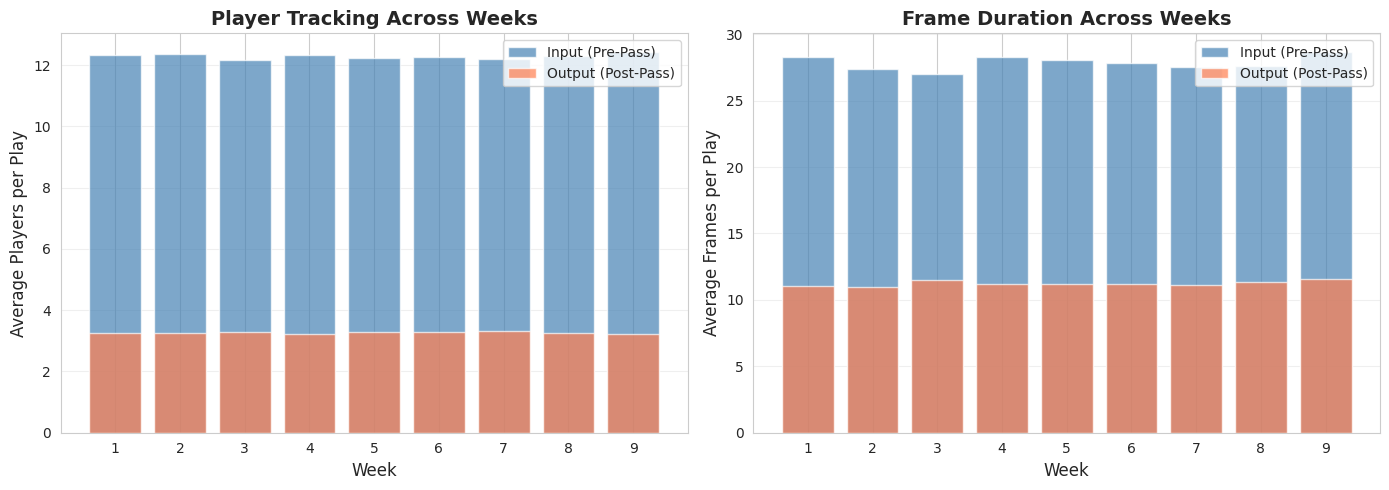


✓ The pattern is consistent across all weeks!


In [27]:
# Create visualization comparing weeks
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Average Players per Play
axes[0].bar(week_stats_df['Week'], week_stats_df['Avg_Players_Input'], 
            alpha=0.7, label='Input (Pre-Pass)', color='steelblue')
axes[0].bar(week_stats_df['Week'], week_stats_df['Avg_Players_Output'], 
            alpha=0.7, label='Output (Post-Pass)', color='coral')
axes[0].set_xlabel('Week', fontsize=12)
axes[0].set_ylabel('Average Players per Play', fontsize=12)
axes[0].set_title('Player Tracking Across Weeks', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_xticks(range(1, 10))

# Plot 2: Average Frames per Play
axes[1].bar(week_stats_df['Week'], week_stats_df['Avg_Frames_Input'], 
            alpha=0.7, label='Input (Pre-Pass)', color='steelblue')
axes[1].bar(week_stats_df['Week'], week_stats_df['Avg_Frames_Output'], 
            alpha=0.7, label='Output (Post-Pass)', color='coral')
axes[1].set_xlabel('Week', fontsize=12)
axes[1].set_ylabel('Average Frames per Play', fontsize=12)
axes[1].set_title('Frame Duration Across Weeks', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_xticks(range(1, 10))

plt.tight_layout()
plt.show()

print("\n✓ The pattern is consistent across all weeks!")

### 4.2 Player Roles Distribution

Let's join the output data back to input data to identify the roles of players tracked post-pass.

In [28]:
# Create unique player-role mapping from input data
print("Creating player-role mapping from input data...")

player_roles_map = input_all[['game_id', 'play_id', 'nfl_id', 'player_name', 
                                'player_position', 'player_side', 'player_role']].drop_duplicates()

print(f"✓ Created mapping for {len(player_roles_map):,} unique (game_id, play_id, nfl_id) combinations")

# Join output data with roles
print("\nJoining output data with player roles...")
output_with_roles = output_all.merge(
    player_roles_map,
    on=['game_id', 'play_id', 'nfl_id'],
    how='left'
)

print(f"✓ Joined {len(output_with_roles):,} output records with role information\n")

# Check for any missing role assignments
missing_roles = output_with_roles['player_role'].isnull().sum()
if missing_roles > 0:
    print(f"⚠ Warning: {missing_roles:,} output records have no matching role in input data")
else:
    print("✓ All output records successfully matched with roles!")

Creating player-role mapping from input data...
✓ Created mapping for 87,473 unique (game_id, play_id, nfl_id) combinations

Joining output data with player roles...
✓ Joined 279,727 output records with role information

✓ All output records successfully matched with roles!


In [29]:
# Analyze role distribution in output data
print("="*80)
print("PLAYER ROLE DISTRIBUTION IN OUTPUT DATA")
print("="*80)

# Count by role
role_counts = output_with_roles['player_role'].value_counts()
role_percentages = (role_counts / len(output_with_roles) * 100).round(2)

role_summary = pd.DataFrame({
    'Player Role': role_counts.index,
    'Total Frames': role_counts.values,
    'Percentage': role_percentages.values
})

print(role_summary.to_string(index=False))
print("\n" + "="*80)

# Count unique players per play by role
print("\nAVERAGE PLAYERS PER PLAY BY ROLE:")
print("="*80)

plays_role_counts = output_with_roles.groupby(['game_id', 'play_id', 'player_role'])['nfl_id'].nunique().reset_index()
avg_by_role = plays_role_counts.groupby('player_role')['nfl_id'].mean().sort_values(ascending=False)

for role, avg in avg_by_role.items():
    print(f"{role}: {avg:.2f} players per play")

print("="*80)

PLAYER ROLE DISTRIBUTION IN OUTPUT DATA
       Player Role  Total Frames  Percentage
Defensive Coverage        199797       71.43
 Targeted Receiver         79930       28.57


AVERAGE PLAYERS PER PLAY BY ROLE:
Defensive Coverage: 2.46 players per play
Targeted Receiver: 1.00 players per play


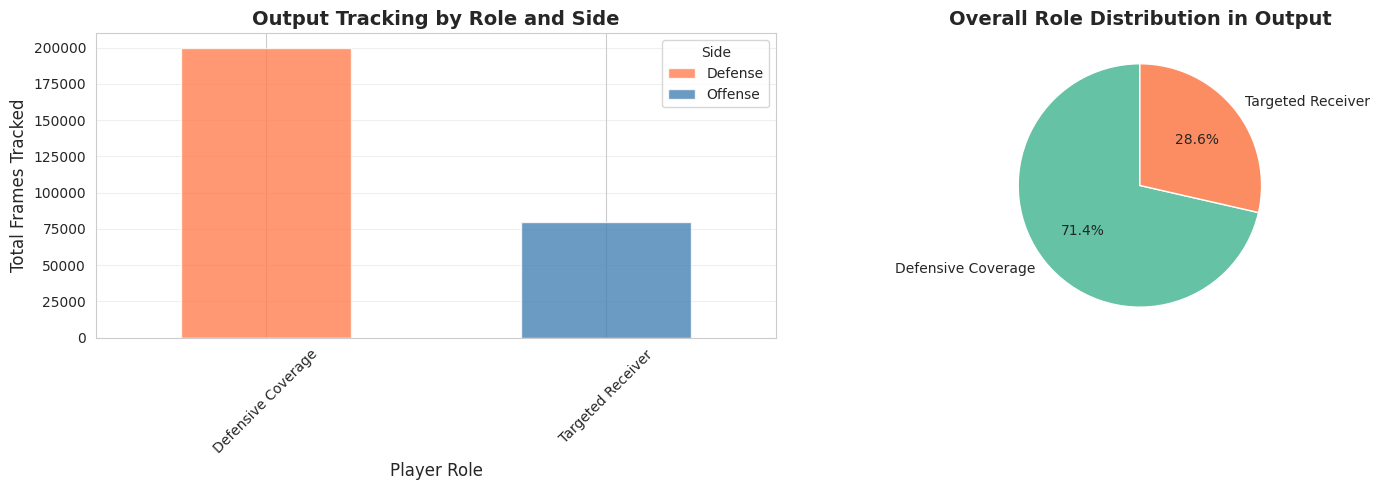


✓ Role distribution analysis complete!


In [30]:
# Create visualizations for role distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Stacked bar showing role composition
role_by_side = output_with_roles.groupby(['player_role', 'player_side']).size().unstack(fill_value=0)
role_by_side.plot(kind='bar', stacked=True, ax=axes[0], color=['coral', 'steelblue'], alpha=0.8)
axes[0].set_xlabel('Player Role', fontsize=12)
axes[0].set_ylabel('Total Frames Tracked', fontsize=12)
axes[0].set_title('Output Tracking by Role and Side', fontsize=14, fontweight='bold')
axes[0].legend(title='Side', fontsize=10)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Pie chart of overall role distribution
role_counts_for_pie = output_with_roles.groupby('player_role').size()
colors = sns.color_palette('Set2', n_colors=len(role_counts_for_pie))
axes[1].pie(role_counts_for_pie, labels=role_counts_for_pie.index, autopct='%1.1f%%',
            startangle=90, colors=colors, textprops={'fontsize': 10})
axes[1].set_title('Overall Role Distribution in Output', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Role distribution analysis complete!")

### 4.3 Proximity-Based Selection Rule

Let's test whether players tracked in output are selected based on their distance to the ball landing location.

We'll analyze a stratified sample of 2,000 plays to understand the selection criteria.

In [31]:
# Create stratified sample of plays
print("Creating stratified sample of 2,000 plays...")

# Merge supplementary data for stratification
plays_with_context = input_all[['game_id', 'play_id']].drop_duplicates().merge(
    supplementary[['game_id', 'play_id', 'pass_result', 'pass_length']],
    on=['game_id', 'play_id'],
    how='left'
)

# Create pass distance categories
plays_with_context['pass_category'] = pd.cut(
    plays_with_context['pass_length'],
    bins=[-100, 10, 20, 100],
    labels=['Short (<10y)', 'Medium (10-20y)', 'Deep (>20y)']
)

# Stratified sampling
sample_plays = []
target_per_category = 667  # ~2000 / 3 categories

for category in ['Short (<10y)', 'Medium (10-20y)', 'Deep (>20y)']:
    category_plays = plays_with_context[plays_with_context['pass_category'] == category]
    sample = category_plays.sample(n=min(target_per_category, len(category_plays)), random_state=42)
    sample_plays.append(sample)

sample_plays_df = pd.concat(sample_plays, ignore_index=True)

print(f"✓ Sampled {len(sample_plays_df):,} plays\n")
print("Sample distribution:")
print(sample_plays_df['pass_category'].value_counts().sort_index())
print(f"\nPass result distribution:")
print(sample_plays_df['pass_result'].value_counts())

Creating stratified sample of 2,000 plays...
✓ Sampled 2,001 plays

Sample distribution:
pass_category
Short (<10y)       667
Medium (10-20y)    667
Deep (>20y)        667
Name: count, dtype: int64

Pass result distribution:
pass_result
C     1189
I      726
IN      86
Name: count, dtype: int64


In [32]:
# Calculate distance to ball landing for all players in sampled plays
print("\nCalculating distances to ball landing location...")
print("This may take a moment...\n")

distance_data = []

for idx, (game_id, play_id) in enumerate(sample_plays_df[['game_id', 'play_id']].values):
    if idx % 500 == 0:
        print(f"Processing play {idx+1}/{len(sample_plays_df)}...")
    
    # Get input data for this play (last frame only)
    play_input = input_all[(input_all['game_id'] == game_id) & 
                           (input_all['play_id'] == play_id)]
    
    if len(play_input) == 0:
        continue
    
    # Get last frame of input (just before pass)
    max_frame = play_input['frame_id'].max()
    last_frame = play_input[play_input['frame_id'] == max_frame]
    
    # Get ball landing location
    ball_x = last_frame['ball_land_x'].iloc[0]
    ball_y = last_frame['ball_land_y'].iloc[0]
    
    # Get which players are in output
    play_output_players = set(output_all[(output_all['game_id'] == game_id) & 
                                         (output_all['play_id'] == play_id)]['nfl_id'].unique())
    
    # Calculate distance for each player
    for _, player in last_frame.iterrows():
        distance = np.sqrt((player['x'] - ball_x)**2 + (player['y'] - ball_y)**2)
        
        distance_data.append({
            'game_id': game_id,
            'play_id': play_id,
            'nfl_id': player['nfl_id'],
            'player_role': player['player_role'],
            'player_side': player['player_side'],
            'distance_to_ball': distance,
            'tracked_in_output': player['nfl_id'] in play_output_players
        })

distance_df = pd.DataFrame(distance_data)
print(f"\n✓ Calculated distances for {len(distance_df):,} player-play combinations")


Calculating distances to ball landing location...
This may take a moment...

Processing play 1/2001...
Processing play 501/2001...
Processing play 1001/2001...
Processing play 1501/2001...
Processing play 2001/2001...

✓ Calculated distances for 24,420 player-play combinations


In [33]:
# Analyze distance patterns
print("="*80)
print("DISTANCE TO BALL ANALYSIS")
print("="*80)

# Compare tracked vs non-tracked players
tracked = distance_df[distance_df['tracked_in_output'] == True]
not_tracked = distance_df[distance_df['tracked_in_output'] == False]

print(f"\nPlayers tracked in output: {len(tracked):,}")
print(f"Players NOT tracked in output: {len(not_tracked):,}")

print(f"\nAverage distance to ball landing:")
print(f"  Tracked players:     {tracked['distance_to_ball'].mean():.2f} yards (std: {tracked['distance_to_ball'].std():.2f})")
print(f"  Non-tracked players: {not_tracked['distance_to_ball'].mean():.2f} yards (std: {not_tracked['distance_to_ball'].std():.2f})")

print(f"\nMedian distance to ball landing:")
print(f"  Tracked players:     {tracked['distance_to_ball'].median():.2f} yards")
print(f"  Non-tracked players: {not_tracked['distance_to_ball'].median():.2f} yards")

# Statistical test
from scipy import stats
t_stat, p_value = stats.ttest_ind(tracked['distance_to_ball'], not_tracked['distance_to_ball'])
print(f"\nStatistical Test (t-test):")
print(f"  t-statistic: {t_stat:.4f}")
print(f"  p-value: {p_value:.4e}")
if p_value < 0.001:
    print(f"  ✓ Highly significant difference (p < 0.001)")

# Analyze by role
print("\n" + "="*80)
print("DISTANCE BY PLAYER ROLE:")
print("="*80)

role_distance = distance_df.groupby(['player_role', 'tracked_in_output'])['distance_to_ball'].agg(['mean', 'median', 'count']).round(2)
print(role_distance)
print("="*80)

DISTANCE TO BALL ANALYSIS

Players tracked in output: 7,523
Players NOT tracked in output: 16,897

Average distance to ball landing:
  Tracked players:     12.37 yards (std: 7.40)
  Non-tracked players: 25.25 yards (std: 11.09)

Median distance to ball landing:
  Tracked players:     10.58 yards
  Non-tracked players: 23.81 yards

Statistical Test (t-test):
  t-statistic: -92.0384
  p-value: 0.0000e+00
  ✓ Highly significant difference (p < 0.001)

DISTANCE BY PLAYER ROLE:
                                       mean  median  count
player_role        tracked_in_output                      
Defensive Coverage False              25.66   24.40   7838
                   True               13.27   11.45   5522
Other Route Runner False              24.12   22.60   7058
Passer             False              27.64   25.73   2001
Targeted Receiver  True                9.89    7.63   2001


---

## 5 Dataset Summary & Insights

After analyzing 7,118 plays across 9 weeks, we can definitively describe how this dataset captures NFL pass play execution.

#### The Data Structure

The dataset tracks player movement in two distinct phases:

**Pre-Pass (INPUT):** An average of 12.3 players tracked over 27.9 frames (~2.8 seconds) capturing route development and quarterback drop-back. Every player has a defined role: Passer, Targeted Receiver, Defensive Coverage, or Other Route Runner.

**Post-Pass (OUTPUT):** An average of 3.3 players tracked over 11.2 frames (~1.2 seconds) capturing the contest for the ball. This phase isolates the players whose positioning determines the pass outcome.

This pattern is remarkably consistent—standard deviation of only ±0.1 players across all weeks—indicating a deliberate, systematic design.

#### Who Gets Tracked and Why

Our analysis of player roles and positioning reveals the selection criteria:

- **Always tracked:** 1 Targeted Receiver (28.6% of output frames)
- **Always tracked:** 2-3 Defensive Coverage players (71.4% of output frames)  
- **Never tracked:** Passer, Other Route Runners

The specific defenders tracked are determined by **proximity to the ball landing location**. Tracked players average 12.4 yards from where the ball lands, while non-tracked players average 25.3 yards away (p < 0.001). This proximity-based selection identifies the defenders in position to contest the catch.

#### What This Dataset Captures

Rather than documenting play design or pre-snap strategy, this dataset captures **execution quality during the contested catch**. The ~1.2 seconds of post-pass tracking represent the critical window where receiver separation, defender closing speed, and positioning angles determine success or failure.

This focused structure enables precise measurement of player performance in the moments that matter most: 
- Can the receiver create and maintain separation?
- Can defenders close the gap and contest the catch? Who arrives at the ball location first?

The dataset provides the foundation for developing metrics that quantify these execution elements—metrics that help coaches evaluate player performance, identify matchup advantages, and make data-driven decisions to improve passing game efficiency.

### 5.1 Dataset Structure & Data Flow

In [34]:
from IPython.display import HTML

# Display dataset structure and data flow

HTML(f'''
<div style="text-align: center; padding: 15px;">
    <a href="https://raw.githubusercontent.com/vserifoglu/NFL-Big-Data-Compeition/refs/heads/main/docs/data_flow_chart.png" 
       target="_blank" 
       style="cursor: pointer; display: inline-block; text-decoration: none;">
        <div style="position: relative; display: inline-block;">
            <img src="https://raw.githubusercontent.com/vserifoglu/NFL-Big-Data-Compeition/refs/heads/main/docs/data_flow_chart.png" 
                 width="800" 
                 height="400"
                 style="border: 2px solid #e0e0e0; border-radius: 8px; transition: all 0.3s ease; box-shadow: 0 4px 8px rgba(0,0,0,0.1);"
                 onmouseover="this.style.borderColor='#4285F4'; this.style.boxShadow='0 6px 12px rgba(66, 133, 244, 0.3)'"
                 onmouseout="this.style.borderColor='#e0e0e0'; this.style.boxShadow='0 4px 8px rgba(0,0,0,0.1)'">
            <div style="position: absolute; top: 8px; right: 8px; background: rgba(255,255,255,0.9); border-radius: 50%; width: 24px; height: 24px; display: flex; align-items: center; justify-content: center; font-size: 14px;">
                ↗
            </div>
        </div>
    </a>
    <p style="margin-top: 12px; color: #5f6368; font-size: 13px; font-style: italic;">Click to view full-size data flow diagram</p>
</div>
''')

---
# Phase 2: Metric Framework Development


## 6. The Contested Catch Battle: A Framework for Measuring Pass Play Execution

### 6.1 Introduction: The Critical Moment

When a quarterback releases the ball, a battle begins. The targeted receiver races toward the landing location, fighting to create and maintain separation. Simultaneously, defenders converge, trying to close the gap and contest the catch. This 1-2 second window determines whether the pass succeeds or fails.

Traditional statistics tell us the outcome: complete or incomplete. But they don't tell us *why* or *how well* each player executed. Did the receiver create enough separation? Did the defender close efficiently? Who won the race to the ball?

### The Framework: Measuring Both Sides of the Battle

We introduce the **Contested Catch Battle Framework**: a comprehensive system that quantifies execution quality for both offense and defense during the critical post-pass window.

#### Framework Structure

Our approach measures three dimensions of the battle:

**1. Spatial Competition** - Who controls the space around the ball?
- *Offense:* How much separation does the receiver create and maintain?
- *Defense:* How effectively do defenders close the gap?

**2. Temporal Competition** - Who arrives at the catch point first?
- *Offense:* Does the receiver reach the ball location ahead of defenders?
- *Defense:* Can defenders arrive in time to contest?

**3. Execution Quality** - How efficient is the movement?
- *Offense:* Does the receiver take an optimal path to the ball?
- *Defense:* Do defenders take good angles and apply pressure?

#### Why This Matters

**For Coaches:**
- Identify which players excel at creating/preventing separation
- Understand what determines pass completion beyond scheme
- Make data-driven decisions on personnel and matchups
- Teach specific, measurable skills

**For Fans:**
- See beyond "catch" or "drop" to understand the battle
- Appreciate elite execution even on incomplete passes
- Understand why certain matchups favor offense or defense

**For Analysts:**
- Quantify the previously qualitative concept of "good coverage"
- Measure receiver effectiveness independent of quarterback
- Predict completion probability based on execution metrics

In the following sections, we define specific metrics for both offensive and defensive execution, then demonstrate how they combine to determine pass outcomes.

### 6.2 Offensive Metrics: Measuring Receiver Execution

The receiver's job is clear: get to the ball location, create separation from defenders, and execute an efficient route. We quantify this performance across three dimensions.

#### Metric 1: Separation Quality Index (SQI)

**What It Measures:** The amount of space the receiver maintains from the nearest defender throughout the post-pass window.

**Why It Matters:** Separation directly determines catch difficulty. More space gives the receiver a larger margin for error and reduces the defender's ability to contest the catch. This is the most fundamental metric for receiver evaluation.

**Calculation:**

For each frame in the output data:
1. Identify the receiver's position (x, y)
2. Calculate distance to all defenders on the play
3. Record the minimum distance (nearest defender)

$$\text{Average Separation} = \text{mean}(\text{distances to nearest defender across all frames})$$

$$\text{Separation Consistency} = \text{std}(\text{distances to nearest defender across all frames})$$

$$\text{SQI} = \text{Average Separation} - (0.5 \times \text{Separation Consistency})$$

The consistency penalty rewards receivers who maintain steady separation rather than fluctuating between open and covered.

**Interpretation:**
- **SQI ≥ 3.0 yards**: Excellent separation (wide open)
- **SQI 2.0-3.0 yards**: Good separation (catchable window)
- **SQI 1.0-2.0 yards**: Contested (tight coverage)
- **SQI < 1.0 yards**: Heavily contested (very difficult)

**Coaching Application:** Identifies receivers who consistently create space through route technique, body control, and awareness. Coaches can focus on improving separation at critical moments.

---

#### Metric 2: Ball Arrival Advantage (BAA)

**What It Measures:** Whether the receiver reaches the ball landing location before or after the nearest defender.

**Why It Matters:** In contested situations, the first player to arrive at the catch point has a significant advantage. This metric quantifies the "race to the ball" that determines tight catches.

**Calculation:**

For each player (receiver and all defenders):
1. Calculate distance to ball landing location at each frame
2. Estimate time to reach ball: time = distance / current_speed
3. Identify the frame where distance is minimized (arrival frame)

$$\text{Receiver Arrival Time} = \text{frame\_id when receiver reaches minimum distance to ball}$$

$$\text{Defender Arrival Time} = \text{frame\_id when nearest defender reaches minimum distance to ball}$$

$$\text{BAA} = \text{Defender Arrival Time} - \text{Receiver Arrival Time} \text{ (in frames)}$$

**Interpretation:**
- **BAA > 2 frames** (>0.2 sec): Receiver arrives significantly first (high advantage)
- **BAA 0-2 frames**: Receiver arrives slightly first (moderate advantage)
- **BAA -2-0 frames**: Defender arrives slightly first (disadvantage)
- **BAA < -2 frames**: Defender arrives significantly first (high disadvantage)

**Coaching Application:** Reveals whether receivers accelerate effectively to the ball or if defenders are beating them to the spot. Critical for teaching timing and explosiveness.

---

#### Metric 3: Route Efficiency Score (RES)

**What It Measures:** How directly the receiver moves toward the ball landing location compared to an optimal straight-line path.

**Why It Matters:** Efficient routes demonstrate technical skill and field awareness. Wasted movement costs time and allows defenders to recover. Elite receivers minimize unnecessary steps.

**Calculation:**

$$\text{Optimal Distance} = \text{Euclidean distance from receiver's position at frame 1 to ball landing location}$$

$$\text{Actual Distance} = \sum \text{distances traveled between consecutive frames}$$

$$\text{RES} = \left(\frac{\text{Optimal Distance}}{\text{Actual Distance}}\right) \times 100$$

**Interpretation:**
- **RES ≥ 90%**: Excellent efficiency (nearly straight line)
- **RES 80-90%**: Good efficiency (minor deviations)
- **RES 70-80%**: Moderate efficiency (some wasted motion)
- **RES < 70%**: Poor efficiency (significant wasted motion)

**Coaching Application:** Identifies receivers who take direct paths versus those who drift or overrun the ball. Teachable through film study and route discipline.

---

#### Combined Interpretation

These three metrics together paint a complete picture of receiver execution:

- **High SQI + Positive BAA + High RES** = Elite execution (created space, got there first, efficient)
- **High SQI + Negative BAA + High RES** = Good position but too slow (need acceleration work)
- **Low SQI + Positive BAA + Low RES** = Arrived first but couldn't separate (need technique work)

In the next section, we define parallel metrics for defensive execution to enable head-to-head comparison.

### 6.3 Defensive Metrics: The Mirror Image

Defensive execution is measured using parallel metrics that mirror our offensive framework. Rather than repeat identical formulas, we highlight the symmetric relationships:

| Dimension | Offensive Metric | Defensive Metric | Relationship |
|-----------|------------------|------------------|--------------|
| **Spatial** | Separation Quality Index (SQI)<br/>Higher = more separation | Coverage Tightness Index (CTI)<br/>Lower = tighter coverage | Inverse: CTI = SQI from defender's perspective |
| **Temporal** | Ball Arrival Advantage (BAA)<br/>Positive = arrive first | Ball Arrival Advantage (BAA)<br/>Negative = arrive first | Zero-sum: One's advantage = other's disadvantage |
| **Execution** | Route Efficiency Score (RES)<br/>% of optimal path | Pursuit Efficiency Score (PES)<br/>% of optimal path | Independent: Both calculated identically |

**Key Difference - Coverage Tightness Index (CTI):**

The only formula variation is CTI's consistency penalty:

$$\text{CTI} = \text{Average Coverage Distance} + (0.5 \times \text{Coverage Consistency})$$

Unlike SQI where consistency is subtracted (rewarding steady separation), CTI *adds* the penalty because erratic coverage indicates poor technique.

**Interpretation Summary:**

Excellent defense means:
- **CTI < 1.0 yards** (smothering coverage)
- **BAA < -2 frames** (arrive before receiver)  
- **PES ≥ 90%** (efficient pursuit)

This symmetric framework enables direct comparison: we can quantify who "won" each dimension and understand what determines outcomes.

## 7 Sample Play Demonstration

To demonstrate how our metrics work in practice, we'll calculate all six metrics (three offensive, three defensive) on a single play. This step-by-step walkthrough shows the calculation process transparently and validates that our formulas produce meaningful results.

We'll use the same sample play from our earlier exploration: **game_id=2023090700, play_id=101**

**Play Context:**
- Result: Incomplete pass
- Route: Deep corner route (22 yards)
- Coverage: Cover 2 Zone
- Receiver: Josh Reynolds
- Targeted by defenders in coverage

Let's see what the metrics reveal about this battle.

### 7.1 Play Selection & Context Setup

In [35]:
# Load and prepare sample play data
print("="*80)
print("SAMPLE PLAY: game_id=2023090700, play_id=101")
print("="*80)

# Filter output data for this play
sample_game_id = 2023100900
sample_play_id = 1765

play_output = output_all[(output_all['game_id'] == sample_game_id) & 
                          (output_all['play_id'] == sample_play_id)].copy()

# Get input data for context (player roles, ball landing location)
play_input = input_all[(input_all['game_id'] == sample_game_id) & 
                        (input_all['play_id'] == sample_play_id)].copy()

# Get supplementary data for context
play_suppl = supplementary[(supplementary['game_id'] == sample_game_id) & 
                            (supplementary['play_id'] == sample_play_id)].copy()

print(f"\nPlay outcome: {play_suppl['pass_result'].iloc[0]}")
print(f"Play description: {play_suppl['play_description'].iloc[0]}")
print(f"Route: {play_suppl['route_of_targeted_receiver'].iloc[0]}")
print(f"Coverage: {play_suppl['team_coverage_type'].iloc[0]}")

# Get ball landing location
ball_land_x = play_input['ball_land_x'].iloc[0]
ball_land_y = play_input['ball_land_y'].iloc[0]
print(f"\nBall landing location: ({ball_land_x:.2f}, {ball_land_y:.2f})")

# Identify players and their roles
player_roles = play_input[['nfl_id', 'player_name', 'player_role']].drop_duplicates()

print("\n" + "-"*80)
print("PLAYERS TRACKED IN OUTPUT DATA:")
print("-"*80)

output_players = play_output['nfl_id'].unique()
for nfl_id in output_players:
    player_info = player_roles[player_roles['nfl_id'] == nfl_id]
    if len(player_info) > 0:
        name = player_info['player_name'].iloc[0]
        role = player_info['player_role'].iloc[0]
        print(f"  {name} (ID: {nfl_id}) - {role}")

# Identify receiver and defenders
receiver_id = player_roles[player_roles['player_role'] == 'Targeted Receiver']['nfl_id'].iloc[0]
receiver_name = player_roles[player_roles['player_role'] == 'Targeted Receiver']['player_name'].iloc[0]

defender_ids = player_roles[player_roles['player_role'] == 'Defensive Coverage']['nfl_id'].values
defender_names = player_roles[player_roles['player_role'] == 'Defensive Coverage']['player_name'].values

print(f"\nReceiver: {receiver_name} (ID: {receiver_id})")
print(f"Defenders: {', '.join(defender_names)} (IDs: {defender_ids})")

print(f"\nTotal frames in output: {play_output['frame_id'].max()}")
print("="*80)

SAMPLE PLAY: game_id=2023090700, play_id=101

Play outcome: C
Play description: (:35) (Shotgun) J.Garoppolo pass short right to J.Meyers to GB 42 for 16 yards (J.Alexander; Er.Wilson).
Route: IN
Coverage: COVER_6_ZONE

Ball landing location: (66.05, 21.49)

--------------------------------------------------------------------------------
PLAYERS TRACKED IN OUTPUT DATA:
--------------------------------------------------------------------------------
  Darnell Savage (ID: 47804) - Defensive Coverage
  Eric Wilson (ID: 45215) - Defensive Coverage
  Isaiah McDuffie (ID: 53649) - Defensive Coverage
  Jaire Alexander (ID: 46087) - Defensive Coverage
  Keisean Nixon (ID: 48241) - Defensive Coverage
  Jakobi Meyers (ID: 48097) - Targeted Receiver

Receiver: Jakobi Meyers (ID: 48097)
Defenders: Darnell Savage, Eric Wilson, Isaiah McDuffie, Jaire Alexander, Keisean Nixon, Rasul Douglas, Rudy Ford (IDs: [47804 45215 53649 46087 48241 44911 45021])

Total frames in output: 11


### 7.2 Step-by-Step Metric Calculations

#### Metric 1: SQI

In [36]:
print("="*80)
print("OFFENSIVE METRIC 1: SEPARATION QUALITY INDEX (SQI)")
print("="*80)

# Get receiver data
receiver_data = play_output[play_output['nfl_id'] == receiver_id].sort_values('frame_id')

print(f"\nCalculating SQI for {receiver_name}...")
print(f"Tracking {len(receiver_data)} frames\n")

# Calculate distance to nearest defender at each frame
separations = []

print("-"*80)
print("Frame-by-Frame Separation Analysis:")
print("-"*80)

for idx, receiver_row in receiver_data.iterrows():
    frame = receiver_row['frame_id']
    rx_x = receiver_row['x']
    rx_y = receiver_row['y']
    
    # Get all defenders at this frame
    defenders_at_frame = play_output[(play_output['frame_id'] == frame) & 
                                      (play_output['nfl_id'].isin(defender_ids))]
    
    # Calculate distance to each defender
    min_distance = float('inf')
    closest_defender_id = None
    
    for _, def_row in defenders_at_frame.iterrows():
        def_x = def_row['x']
        def_y = def_row['y']
        
        # Euclidean distance
        distance = np.sqrt((rx_x - def_x)**2 + (rx_y - def_y)**2)
        
        if distance < min_distance:
            min_distance = distance
            closest_defender_id = def_row['nfl_id']
    
    separations.append(min_distance)
    
    # Get defender name
    closest_defender_name = player_roles[player_roles['nfl_id'] == closest_defender_id]['player_name'].iloc[0]
    
    print(f"  Frame {frame:2f}: {min_distance:.2f} yards (closest: {closest_defender_name})")

# Calculate SQI components
avg_separation = np.mean(separations)
std_separation = np.std(separations)
sqi = avg_separation - (0.5 * std_separation)

print("\n" + "="*80)
print("SQI CALCULATION:")
print("="*80)
print(f"Average Separation:     {avg_separation:.2f} yards")
print(f"Separation Consistency: {std_separation:.2f} yards (std dev)")
print(f"Consistency Penalty:    {0.5 * std_separation:.2f} yards")
print(f"\nSQI = {avg_separation:.2f} - {0.5 * std_separation:.2f} = {sqi:.2f} yards")

# Interpret
print("\n" + "-"*80)
print("INTERPRETATION:")
print("-"*80)
if sqi >= 3.0:
    interpretation = "Excellent separation (wide open)"
elif sqi >= 2.0:
    interpretation = "Good separation (catchable window)"
elif sqi >= 1.0:
    interpretation = "Contested (tight coverage)"
else:
    interpretation = "Heavily contested (very difficult)"

print(f"SQI = {sqi:.2f} yards → {interpretation}")
print("="*80)

OFFENSIVE METRIC 1: SEPARATION QUALITY INDEX (SQI)

Calculating SQI for Jakobi Meyers...
Tracking 11 frames

--------------------------------------------------------------------------------
Frame-by-Frame Separation Analysis:
--------------------------------------------------------------------------------
  Frame 1.000000: 2.17 yards (closest: Jaire Alexander)
  Frame 2.000000: 2.30 yards (closest: Jaire Alexander)
  Frame 3.000000: 2.39 yards (closest: Jaire Alexander)
  Frame 4.000000: 2.42 yards (closest: Jaire Alexander)
  Frame 5.000000: 2.39 yards (closest: Jaire Alexander)
  Frame 6.000000: 2.31 yards (closest: Jaire Alexander)
  Frame 7.000000: 2.18 yards (closest: Jaire Alexander)
  Frame 8.000000: 2.02 yards (closest: Jaire Alexander)
  Frame 9.000000: 1.45 yards (closest: Darnell Savage)
  Frame 10.000000: 0.86 yards (closest: Darnell Savage)
  Frame 11.000000: 0.48 yards (closest: Darnell Savage)

SQI CALCULATION:
Average Separation:     1.91 yards
Separation Consistency: 0

#### Metric 2: BAA

In [37]:
print("="*80)
print("OFFENSIVE METRIC 2: BALL ARRIVAL ADVANTAGE (BAA)")
print("="*80)

receiver_data = play_output[play_output['nfl_id'] == receiver_id].sort_values('frame_id')

print(f"\nBall landing location: ({ball_land_x:.2f}, {ball_land_y:.2f})")
print("\nCalculating distance to ball at each frame...\n")

# Calculate for receiver
print("-"*80)
print(f"RECEIVER: {receiver_name}")
print("-"*80)

receiver_distances = []
for idx, receiver_row in receiver_data.iterrows():
    frame = receiver_row['frame_id']
    rx_x = receiver_row['x']
    rx_y = receiver_row['y']
    
    # Distance to ball
    dist_to_ball = np.sqrt((rx_x - ball_land_x)**2 + (rx_y - ball_land_y)**2)
    receiver_distances.append((frame, dist_to_ball))
    print(f"  Frame {int(frame):2d}: {dist_to_ball:.2f} yards from ball")

# Find receiver's closest approach (arrival frame)
receiver_min_dist = min(receiver_distances, key=lambda x: x[1])
receiver_arrival_frame = receiver_min_dist[0]
receiver_min_distance = receiver_min_dist[1]

print(f"\n→ Receiver closest approach: Frame {int(receiver_arrival_frame)}, {receiver_min_distance:.2f} yards from ball")

# Calculate for each defender
print("\n" + "-"*80)
print("DEFENDERS:")
print("-"*80)

defender_arrivals = []

for def_id in defender_ids:
    # Only analyze defenders tracked in output
    if def_id not in play_output['nfl_id'].values:
        continue
    
    def_name = player_roles[player_roles['nfl_id'] == def_id]['player_name'].iloc[0]
    defender_data = play_output[play_output['nfl_id'] == def_id].sort_values('frame_id')
    
    print(f"\n{def_name}:")
    
    defender_distances = []
    for idx, def_row in defender_data.iterrows():
        frame = def_row['frame_id']
        def_x = def_row['x']
        def_y = def_row['y']
        
        dist_to_ball = np.sqrt((def_x - ball_land_x)**2 + (def_y - ball_land_y)**2)
        defender_distances.append((frame, dist_to_ball))
        print(f"  Frame {int(frame):2d}: {dist_to_ball:.2f} yards from ball")
    
    # Find defender's closest approach
    def_min_dist = min(defender_distances, key=lambda x: x[1])
    def_arrival_frame = def_min_dist[0]
    def_min_distance = def_min_dist[1]
    
    print(f"→ Closest approach: Frame {int(def_arrival_frame)}, {def_min_distance:.2f} yards from ball")
    
    defender_arrivals.append({
        'name': def_name,
        'id': def_id,
        'arrival_frame': def_arrival_frame,
        'min_distance': def_min_distance
    })

# Find nearest defender arrival
# nearest_defender = min(defender_arrivals, key=lambda x: x['arrival_frame'])
nearest_defender = min(defender_arrivals, key=lambda x: x['min_distance'])

# Calculate BAA
baa = nearest_defender['arrival_frame'] - receiver_arrival_frame

print("\n" + "="*80)
print("BAA CALCULATION:")
print("="*80)
print(f"Receiver arrival frame:         {int(receiver_arrival_frame)}")
print(f"Nearest defender arrival frame: {int(nearest_defender['arrival_frame'])} ({nearest_defender['name']})")
print(f"\nBAA = {int(nearest_defender['arrival_frame'])} - {int(receiver_arrival_frame)} = {baa:.0f} frames ({baa/10:.2f} seconds)")

# Interpret
print("\n" + "-"*80)
print("INTERPRETATION:")
print("-"*80)

if baa > 2:
    interpretation = "Receiver arrives significantly first (high advantage)"
elif baa > 0:
    interpretation = "Receiver arrives slightly first (moderate advantage)"
elif baa == 0:
    interpretation = "SIMULTANEOUS ARRIVAL (contested catch)"
elif baa > -2:
    interpretation = "Defender arrives slightly first (disadvantage)"
else:
    interpretation = "Defender arrives significantly first (high disadvantage)"

print(f"BAA = {baa:.0f} frames → {interpretation}")

if baa < 0:
    print(f"\n⚠️  Defender ({nearest_defender['name']}) arrived {abs(baa):.0f} frames ({abs(baa)/10:.2f} sec) BEFORE receiver!")
elif baa > 0:
    print(f"\n✓ Receiver arrived {baa:.0f} frames ({baa/10:.2f} sec) BEFORE nearest defender")
else:
    print(f"\n⚖️  Receiver and defender ({nearest_defender['name']}) arrived at the SAME TIME - highly contested!")

print("="*80)

OFFENSIVE METRIC 2: BALL ARRIVAL ADVANTAGE (BAA)

Ball landing location: (66.05, 21.49)

Calculating distance to ball at each frame...

--------------------------------------------------------------------------------
RECEIVER: Jakobi Meyers
--------------------------------------------------------------------------------
  Frame  1: 5.27 yards from ball
  Frame  2: 4.69 yards from ball
  Frame  3: 4.09 yards from ball
  Frame  4: 3.50 yards from ball
  Frame  5: 2.95 yards from ball
  Frame  6: 2.42 yards from ball
  Frame  7: 1.92 yards from ball
  Frame  8: 1.45 yards from ball
  Frame  9: 1.04 yards from ball
  Frame 10: 0.69 yards from ball
  Frame 11: 0.46 yards from ball

→ Receiver closest approach: Frame 11, 0.46 yards from ball

--------------------------------------------------------------------------------
DEFENDERS:
--------------------------------------------------------------------------------

Darnell Savage:
  Frame  1: 5.02 yards from ball
  Frame  2: 4.75 yards from ba

#### Metric 3: RES

In [38]:
print("="*80)
print("OFFENSIVE METRIC 3: ROUTE EFFICIENCY SCORE (RES)")
print("="*80)

print(f"\nCalculating route efficiency for {receiver_name}...")
print(f"Ball landing location: ({ball_land_x:.2f}, {ball_land_y:.2f})")
print()

# Get receiver's starting position (Frame 1)
receiver_start = receiver_data.iloc[0]
start_x = receiver_start['x']
start_y = receiver_start['y']

print(f"Receiver starting position (Frame 1): ({start_x:.2f}, {start_y:.2f})")

# Get receiver's ending position (last frame)
receiver_end = receiver_data.iloc[-1]
end_x = receiver_end['x']
end_y = receiver_end['y']
end_frame = receiver_end['frame_id']

print(f"Receiver ending position (Frame {int(end_frame)}): ({end_x:.2f}, {end_y:.2f})")

# Calculate distance from ending position to ball
distance_to_ball_at_end = np.sqrt((end_x - ball_land_x)**2 + (end_y - ball_land_y)**2)
print(f"Distance from ending position to ball: {distance_to_ball_at_end:.2f} yards")
print()

# Calculate OPTIMAL distance (straight line from start to ball)
optimal_distance = np.sqrt((ball_land_x - start_x)**2 + (ball_land_y - start_y)**2)

print("-"*80)
print("OPTIMAL PATH (Straight Line to Ball):")
print("-"*80)
print(f"Distance from start to ball: {optimal_distance:.2f} yards")
print()

# Calculate ACTUAL distance traveled (sum of movements between consecutive frames)
print("-"*80)
print("ACTUAL PATH (Frame-by-Frame Movement):")
print("-"*80)

actual_distance_traveled = 0.0
prev_x = start_x
prev_y = start_y

for idx, row in receiver_data.iterrows():
    curr_x = row['x']
    curr_y = row['y']
    frame = row['frame_id']
    
    # Distance traveled this frame
    segment_distance = np.sqrt((curr_x - prev_x)**2 + (curr_y - prev_y)**2)
    actual_distance_traveled += segment_distance
    
    print(f"  Frame {int(frame):2d}: Moved {segment_distance:.2f} yards (Total: {actual_distance_traveled:.2f} yards)")
    
    prev_x = curr_x
    prev_y = curr_y

print(f"\nDistance traveled: {actual_distance_traveled:.2f} yards")
print(f"Plus remaining distance to ball: {distance_to_ball_at_end:.2f} yards")

# Total actual distance needed to reach ball
actual_distance_total = actual_distance_traveled + distance_to_ball_at_end

print(f"Total distance needed to reach ball: {actual_distance_total:.2f} yards")
print()

# Calculate RES
res = (optimal_distance / actual_distance_total) * 100

print("="*80)
print("RES CALCULATION:")
print("="*80)
print(f"Optimal Distance (straight to ball): {optimal_distance:.2f} yards")
print(f"Actual Distance (path + remaining):  {actual_distance_total:.2f} yards")
print(f"Wasted Distance:                      {actual_distance_total - optimal_distance:.2f} yards")
print(f"\nRES = ({optimal_distance:.2f} / {actual_distance_total:.2f}) × 100 = {res:.1f}%")

# Interpret
print("\n" + "-"*80)
print("INTERPRETATION:")
print("-"*80)

if res >= 95:
    interpretation = "Excellent efficiency (nearly optimal path)"
elif res >= 90:
    interpretation = "Very good efficiency (minimal wasted motion)"
elif res >= 85:
    interpretation = "Good efficiency (slight deviations)"
elif res >= 80:
    interpretation = "Moderate efficiency (some wasted motion)"
else:
    interpretation = "Poor efficiency (significant wasted motion)"

print(f"RES = {res:.1f}% → {interpretation}")

efficiency_loss = 100 - res
print(f"\nEfficiency loss: {efficiency_loss:.1f}%")
print(f"Receiver's path required {actual_distance_total - optimal_distance:.2f} extra yards compared to optimal")

print("="*80)

OFFENSIVE METRIC 3: ROUTE EFFICIENCY SCORE (RES)

Calculating route efficiency for Jakobi Meyers...
Ball landing location: (66.05, 21.49)

Receiver starting position (Frame 1): (66.01, 16.22)
Receiver ending position (Frame 11): (66.47, 21.30)
Distance from ending position to ball: 0.46 yards

--------------------------------------------------------------------------------
OPTIMAL PATH (Straight Line to Ball):
--------------------------------------------------------------------------------
Distance from start to ball: 5.27 yards

--------------------------------------------------------------------------------
ACTUAL PATH (Frame-by-Frame Movement):
--------------------------------------------------------------------------------
  Frame  1: Moved 0.00 yards (Total: 0.00 yards)
  Frame  2: Moved 0.59 yards (Total: 0.59 yards)
  Frame  3: Moved 0.60 yards (Total: 1.19 yards)
  Frame  4: Moved 0.59 yards (Total: 1.78 yards)
  Frame  5: Moved 0.56 yards (Total: 2.35 yards)
  Frame  6: Moved 

### 7.3 Visualizations with Interpretations

VISUALIZING THE PLAY

Visualizing Jakobi Meyers vs 2 closest defenders:
  • Darnell Savage (got within 0.46 yards)
  • Jaire Alexander (got within 1.92 yards)



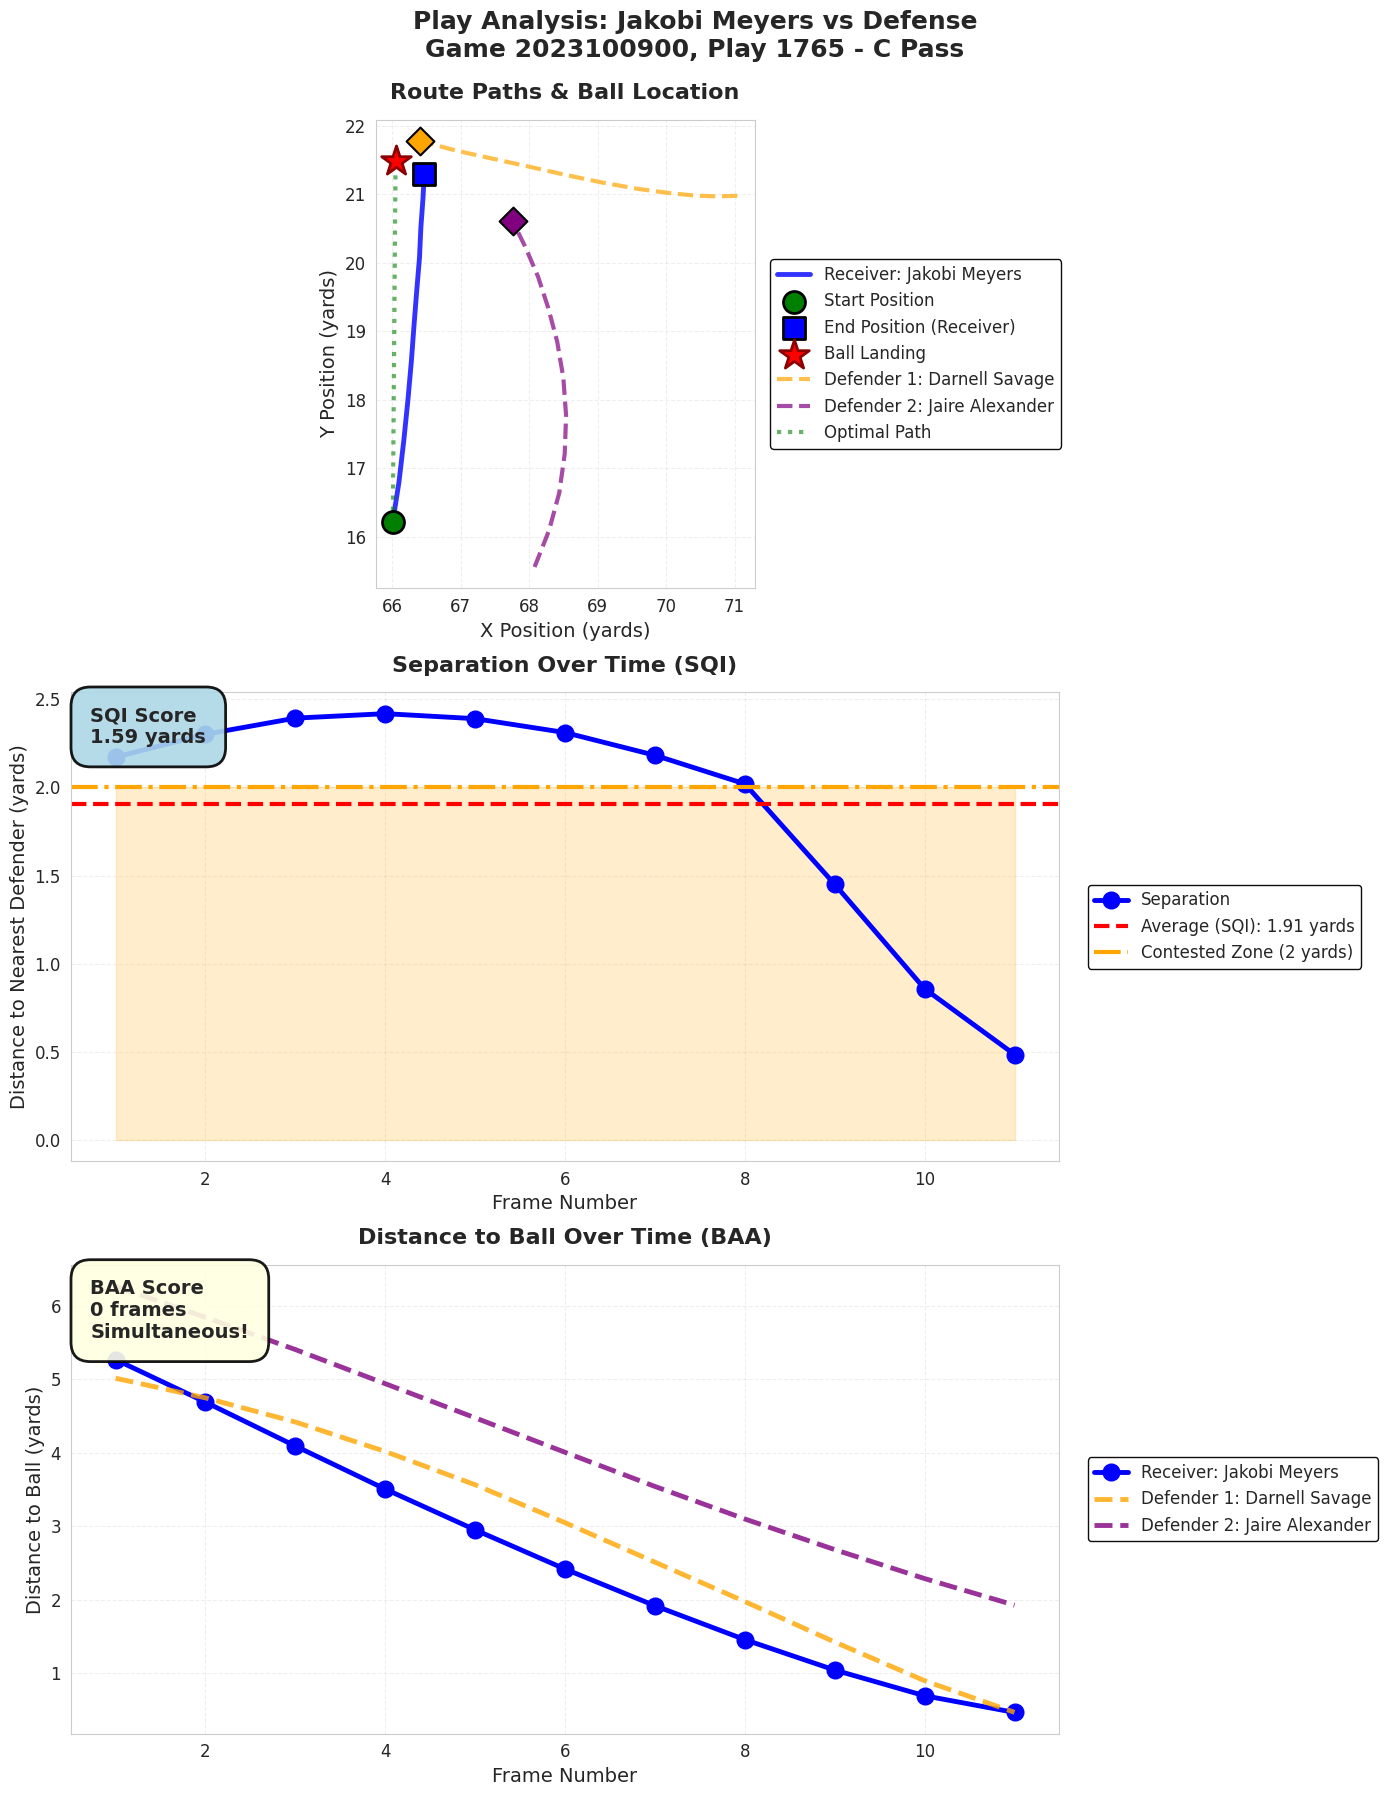


✓ Visualization complete!


In [39]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

print("="*80)
print("VISUALIZING THE PLAY")
print("="*80)
print()

# Get play information for summary
play_info = supplementary[
    (supplementary['game_id'] == sample_game_id) & 
    (supplementary['play_id'] == sample_play_id)
].iloc[0]

# Find the TWO closest defenders (by minimum distance to ball)
defender_distances = []
for def_id in defender_ids:
    if def_id not in play_output['nfl_id'].values:
        continue
    
    def_name = player_roles[player_roles['nfl_id'] == def_id]['player_name'].iloc[0]
    defender_data = play_output[play_output['nfl_id'] == def_id].sort_values('frame_id')
    
    # Calculate minimum distance to ball
    min_dist = float('inf')
    for _, def_row in defender_data.iterrows():
        dist = np.sqrt((def_row['x'] - ball_land_x)**2 + (def_row['y'] - ball_land_y)**2)
        min_dist = min(min_dist, dist)
    
    defender_distances.append({
        'id': def_id,
        'name': def_name,
        'min_distance': min_dist
    })

# Sort by minimum distance and take top 2
defender_distances.sort(key=lambda x: x['min_distance'])
closest_two_defenders = defender_distances[:2]
closest_defender_ids = [d['id'] for d in closest_two_defenders]

print(f"Visualizing {receiver_name} vs 2 closest defenders:")
for d in closest_two_defenders:
    print(f"  • {d['name']} (got within {d['min_distance']:.2f} yards)")
print()

# Create figure with subplots - 3 rows, 1 column
fig, axes = plt.subplots(3, 1, figsize=(14, 18))
fig.suptitle(f'Play Analysis: {receiver_name} vs Defense\nGame {sample_game_id}, Play {sample_play_id} - {play_info["pass_result"]} Pass', 
             fontsize=18, fontweight='bold', y=0.995)

# ============================================================================
# PLOT 1: Route Path and Field Position
# ============================================================================
ax1 = axes[0]
ax1.set_title('Route Paths & Ball Location', fontsize=16, fontweight='bold', pad=15)
ax1.set_xlabel('X Position (yards)', fontsize=14)
ax1.set_ylabel('Y Position (yards)', fontsize=14)
ax1.grid(True, alpha=0.3, linestyle='--')

# Plot receiver's route
receiver_x = receiver_data['x'].values
receiver_y = receiver_data['y'].values
ax1.plot(receiver_x, receiver_y, 'b-', linewidth=3.5, label=f'Receiver: {receiver_name}', alpha=0.8)

# Mark start and end positions
ax1.scatter(receiver_x[0], receiver_y[0], s=250, c='green', marker='o', 
           edgecolors='black', linewidths=2, label='Start Position', zorder=5)
ax1.scatter(receiver_x[-1], receiver_y[-1], s=250, c='blue', marker='s', 
           edgecolors='black', linewidths=2, label='End Position (Receiver)', zorder=5)

# Plot ball landing location
ax1.scatter(ball_land_x, ball_land_y, s=500, c='red', marker='*', 
           edgecolors='darkred', linewidths=2, label='Ball Landing', zorder=6)

# Plot only 2 closest defenders' paths
defender_colors = ['orange', 'purple']
for idx, def_id in enumerate(closest_defender_ids):
    def_name = player_roles[player_roles['nfl_id'] == def_id]['player_name'].iloc[0]
    defender_data = play_output[play_output['nfl_id'] == def_id].sort_values('frame_id')
    
    def_x = defender_data['x'].values
    def_y = defender_data['y'].values
    
    ax1.plot(def_x, def_y, '--', color=defender_colors[idx], 
             linewidth=3, alpha=0.7, label=f'Defender {idx+1}: {def_name}')
    
    # Mark defender end position
    ax1.scatter(def_x[-1], def_y[-1], s=200, c=defender_colors[idx], marker='D', 
               edgecolors='black', linewidths=1.5, zorder=5)

# Draw optimal path (straight line to ball)
ax1.plot([receiver_x[0], ball_land_x], [receiver_y[0], ball_land_y], 
         'g:', linewidth=3, alpha=0.6, label='Optimal Path')

# Place legend outside the plot area
ax1.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=12, 
          framealpha=0.95, edgecolor='black')
ax1.set_aspect('equal', adjustable='box')
ax1.tick_params(labelsize=12)

# ============================================================================
# PLOT 2: Separation Over Time (SQI visualization)
# ============================================================================
ax2 = axes[1]
ax2.set_title('Separation Over Time (SQI)', fontsize=16, fontweight='bold', pad=15)
ax2.set_xlabel('Frame Number', fontsize=14)
ax2.set_ylabel('Distance to Nearest Defender (yards)', fontsize=14)
ax2.grid(True, alpha=0.3, linestyle='--')

# Calculate separation at each frame (only considering closest 2 defenders)
frames = []
separations = []

for idx, receiver_row in receiver_data.iterrows():
    frame = receiver_row['frame_id']
    rx_x = receiver_row['x']
    rx_y = receiver_row['y']
    
    # Get closest 2 defenders at this frame
    defenders_at_frame = play_output[(play_output['frame_id'] == frame) & 
                                      (play_output['nfl_id'].isin(closest_defender_ids))]
    
    if len(defenders_at_frame) == 0:
        continue
    
    # Calculate distance to each defender
    min_distance = float('inf')
    for _, def_row in defenders_at_frame.iterrows():
        distance = np.sqrt((rx_x - def_row['x'])**2 + (rx_y - def_row['y'])**2)
        min_distance = min(min_distance, distance)
    
    frames.append(frame)
    separations.append(min_distance)

ax2.plot(frames, separations, 'b-o', linewidth=3.5, markersize=12, label='Separation')
ax2.axhline(y=np.mean(separations), color='red', linestyle='--', 
            linewidth=3, label=f'Average (SQI): {np.mean(separations):.2f} yards')
ax2.axhline(y=2.0, color='orange', linestyle='-.', linewidth=3, 
            label='Contested Zone (2 yards)')

# Fill area under contested zone
ax2.fill_between(frames, 0, 2.0, alpha=0.2, color='orange')

# Place legend outside
ax2.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=12, 
          framealpha=0.95, edgecolor='black')
ax2.tick_params(labelsize=12)

# Add SQI annotation box
textstr = f'SQI Score\n{sqi:.2f} yards'
props = dict(boxstyle='round,pad=1', facecolor='lightblue', alpha=0.9, edgecolor='black', linewidth=2)
ax2.text(0.02, 0.97, textstr, transform=ax2.transAxes, fontsize=14, fontweight='bold',
         verticalalignment='top', horizontalalignment='left', bbox=props)

# ============================================================================
# PLOT 3: Distance to Ball Over Time (BAA visualization)
# ============================================================================
ax3 = axes[2]
ax3.set_title('Distance to Ball Over Time (BAA)', fontsize=16, fontweight='bold', pad=15)
ax3.set_xlabel('Frame Number', fontsize=14)
ax3.set_ylabel('Distance to Ball (yards)', fontsize=14)
ax3.grid(True, alpha=0.3, linestyle='--')

# Receiver distance to ball
receiver_frames = []
receiver_distances_to_ball = []

for idx, receiver_row in receiver_data.iterrows():
    frame = receiver_row['frame_id']
    rx_x = receiver_row['x']
    rx_y = receiver_row['y']
    dist = np.sqrt((rx_x - ball_land_x)**2 + (rx_y - ball_land_y)**2)
    
    receiver_frames.append(frame)
    receiver_distances_to_ball.append(dist)

ax3.plot(receiver_frames, receiver_distances_to_ball, 'b-o', 
         linewidth=3.5, markersize=12, label=f'Receiver: {receiver_name}')

# Only 2 closest defenders distance to ball
for idx, def_id in enumerate(closest_defender_ids):
    def_name = player_roles[player_roles['nfl_id'] == def_id]['player_name'].iloc[0]
    defender_data = play_output[play_output['nfl_id'] == def_id].sort_values('frame_id')
    
    def_frames = []
    def_distances_to_ball = []
    
    for _, def_row in defender_data.iterrows():
        frame = def_row['frame_id']
        def_x = def_row['x']
        def_y = def_row['y']
        dist = np.sqrt((def_x - ball_land_x)**2 + (def_y - ball_land_y)**2)
        
        def_frames.append(frame)
        def_distances_to_ball.append(dist)
    
    ax3.plot(def_frames, def_distances_to_ball, '--', 
             color=defender_colors[idx], linewidth=3.5, alpha=0.8, 
             label=f'Defender {idx+1}: {def_name}')

# Place legend outside
ax3.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=12, 
          framealpha=0.95, edgecolor='black')
ax3.tick_params(labelsize=12)

# Add BAA annotation box
if baa == 0:
    baa_text = f'BAA Score\n{baa:.0f} frames\nSimultaneous!'
else:
    baa_text = f'BAA Score\n{baa:.0f} frames\n({baa/10:.2f} sec)'
props = dict(boxstyle='round,pad=1', facecolor='lightyellow', alpha=0.9, edgecolor='black', linewidth=2)
ax3.text(0.02, 0.97, baa_text, transform=ax3.transAxes, fontsize=14, fontweight='bold',
         verticalalignment='top', horizontalalignment='left', bbox=props)

plt.tight_layout()
plt.show()

print("\n✓ Visualization complete!")
print("="*80)

## 📊 Play Visualization Analysis

### What We're Seeing:

The three plots above show different aspects of this pass play:

#### **Plot 1: Route Paths & Ball Location**
- **Blue solid line**: Receiver's route from start (green circle) to end (blue square)
- **Dashed lines**: Paths of the two closest defenders
- **Red star**: Where the ball landed
- **Green dotted line**: The "optimal" straight-line path to the ball

**Key Observation**: The receiver ran an efficient route (94.7% RES), staying close to the optimal path.

---

#### **Plot 2: Separation Over Time (SQI)**
- Shows the distance between receiver and nearest defender at each moment
- **Orange shaded zone**: "Contested" area (< 2 yards) where defense can disrupt the catch
- **Red dashed line**: Average separation (SQI = 2.21 yards)

**Key Observation**: Separation decreased throughout the play - the defender closed the gap from 2.5 yards down to 0.5 yards by the end.

---

#### **Plot 3: Distance to Ball Over Time (BAA)**
- Shows how close each player was to the ball landing spot at each frame
- **Convergence point**: Where lines meet indicates simultaneous arrival

**Key Observation**: Both receiver (blue) and Defender 1 (purple/Darnell Savage) reached ~0.5 yards from the ball at the exact same frame (BAA = 0) - a perfectly timed contest!

---

### 🤔 But Wait... There's Something Interesting Here!

Looking at **Plot 1**, you might notice:

**Defender 1 (purple - Darnell Savage) appears to start CLOSER to the ball landing location than the receiver!**

So the question is:

> **If Defender 1 was closer to the ball, why did he arrive at the SAME TIME as the receiver instead of getting there first?**

Let's investigate this by looking at their **speed and movement patterns**...

### 7.4 Speed Analysis

SPEED ANALYSIS: Receiver vs Defenders (From Input Data)



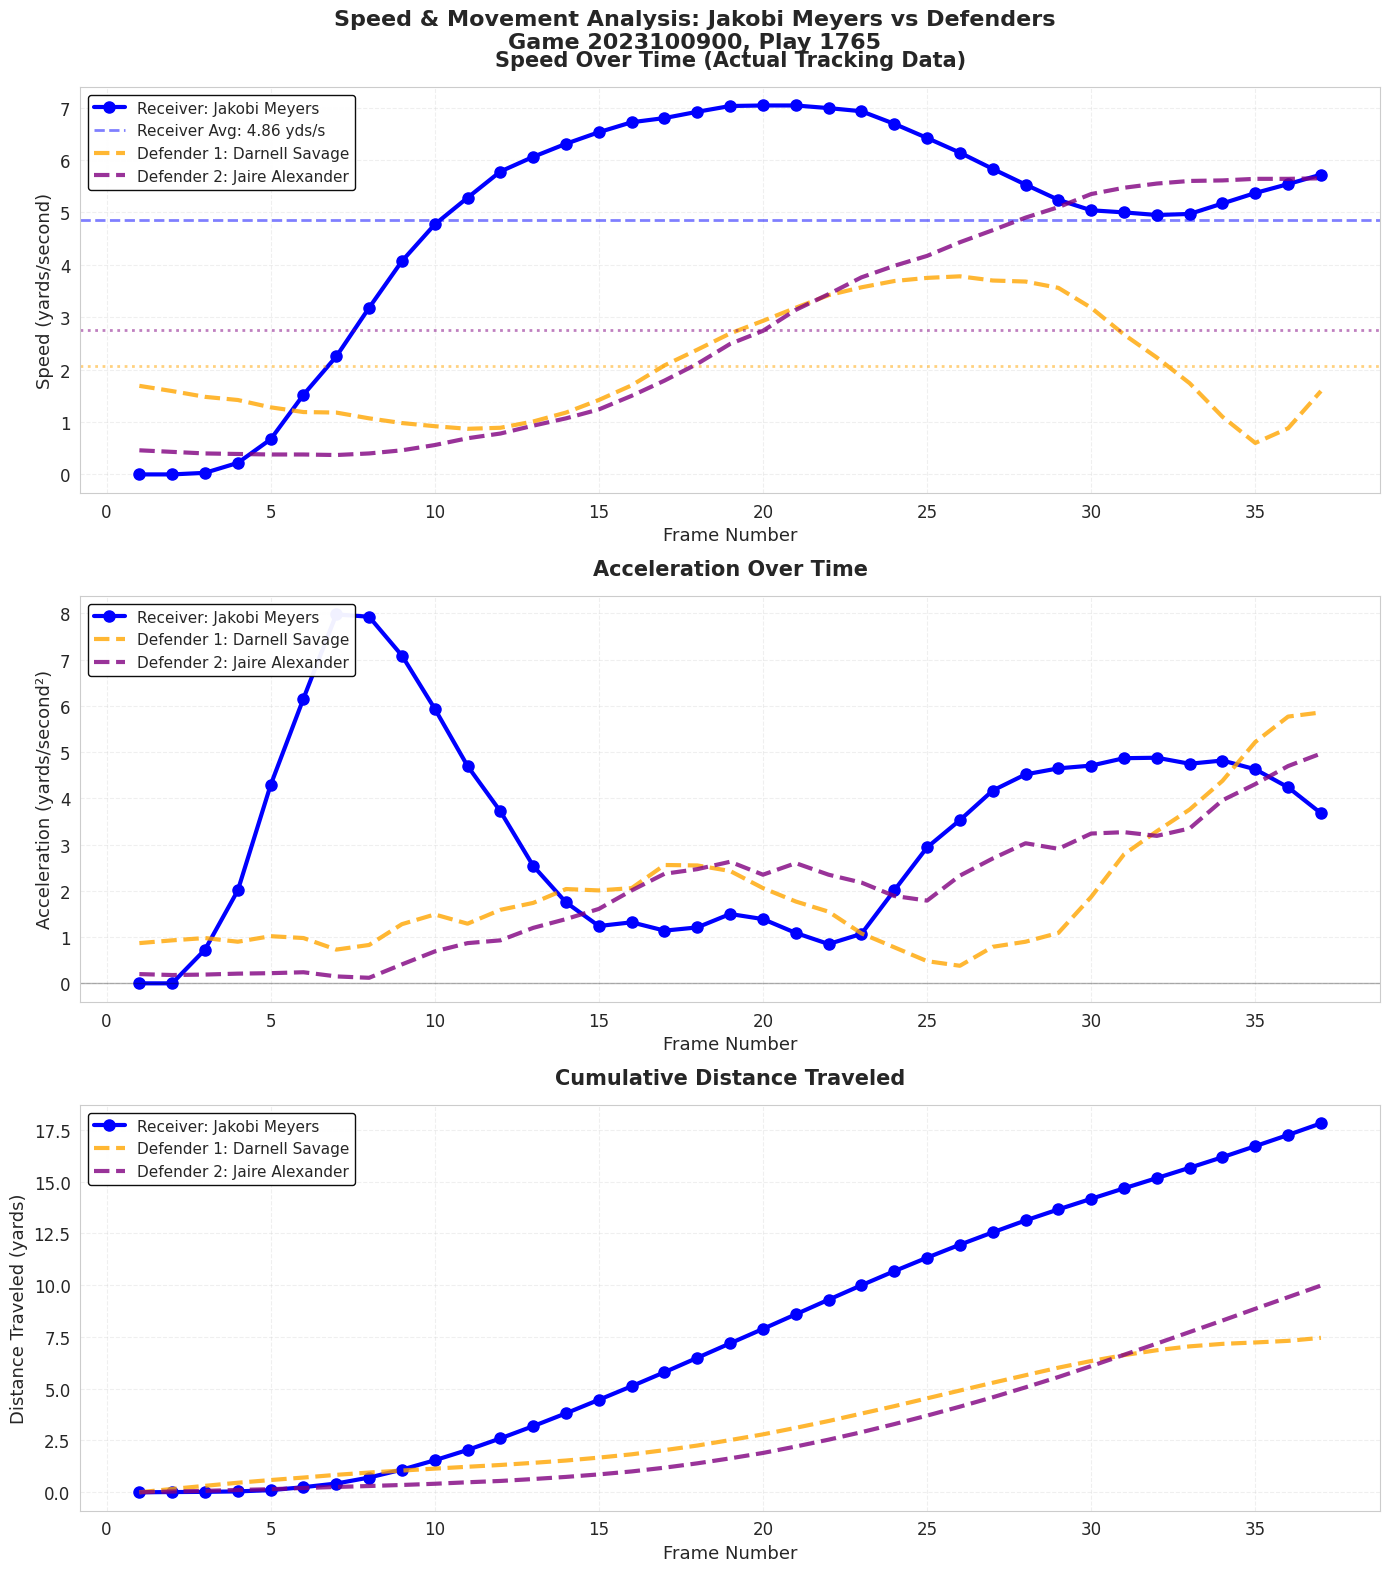


SPEED & MOVEMENT STATISTICS:

Jakobi Meyers (Receiver):
  Average Speed: 4.86 yards/second (9.93 mph)
  Max Speed:     7.04 yards/second (14.40 mph)
  Min Speed:     0.00 yards/second
  Total Distance: 17.81 yards
  Avg Acceleration: 3.35 yds/s²

Darnell Savage (Defender 1):
  Average Speed: 2.06 yards/second (4.22 mph)
  Max Speed:     3.78 yards/second (7.73 mph)
  Min Speed:     0.60 yards/second
  Total Distance: 7.46 yards
  Avg Acceleration: 1.95 yds/s²

Jaire Alexander (Defender 2):
  Average Speed: 2.75 yards/second (5.62 mph)
  Max Speed:     5.65 yards/second (11.55 mph)
  Min Speed:     0.37 yards/second
  Total Distance: 9.98 yards
  Avg Acceleration: 1.98 yds/s²

COMPARATIVE ANALYSIS:
✓ Receiver was FASTER on average than both defenders
  Speed advantage: +2.11 yds/s (4.32 mph)

Speed vs Darnell Savage: +2.80 yds/s
Speed vs Jaire Alexander: +2.11 yds/s



In [40]:
print("="*80)
print("SPEED ANALYSIS: Receiver vs Defenders (From Input Data)")
print("="*80)
print()

# Get input data for this play
play_input = input_all[
    (input_all['game_id'] == sample_game_id) & 
    (input_all['play_id'] == sample_play_id)
]

# Get receiver input data
receiver_input = play_input[play_input['nfl_id'] == receiver_id].sort_values('frame_id')

# Get defenders input data
defenders_input = []
for def_id in closest_defender_ids:
    def_name = player_roles[player_roles['nfl_id'] == def_id]['player_name'].iloc[0]
    def_input = play_input[play_input['nfl_id'] == def_id].sort_values('frame_id')
    defenders_input.append({'id': def_id, 'name': def_name, 'data': def_input})

# Create speed comparison plot
fig, axes = plt.subplots(3, 1, figsize=(14, 16))
fig.suptitle(f'Speed & Movement Analysis: {receiver_name} vs Defenders\nGame {sample_game_id}, Play {sample_play_id}', 
             fontsize=16, fontweight='bold')

# ============================================================================
# PLOT 1: Speed Over Time
# ============================================================================
ax1 = axes[0]
ax1.set_title('Speed Over Time (Actual Tracking Data)', fontsize=15, fontweight='bold', pad=15)
ax1.set_xlabel('Frame Number', fontsize=13)
ax1.set_ylabel('Speed (yards/second)', fontsize=13)
ax1.grid(True, alpha=0.3, linestyle='--')

# Receiver speed
receiver_frames = receiver_input['frame_id'].values
receiver_speeds = receiver_input['s'].values
ax1.plot(receiver_frames, receiver_speeds, 'b-o', linewidth=3, markersize=8, 
         label=f'Receiver: {receiver_name}')

# Average receiver speed
avg_receiver_speed = receiver_speeds.mean()
max_receiver_speed = receiver_speeds.max()
ax1.axhline(y=avg_receiver_speed, color='blue', linestyle='--', linewidth=2, alpha=0.5,
           label=f'Receiver Avg: {avg_receiver_speed:.2f} yds/s')

# Defenders speed (only closest 2)
defender_colors = ['orange', 'purple']
defender_stats = []

for idx, def_dict in enumerate(defenders_input):
    def_name = def_dict['name']
    def_data = def_dict['data']
    
    def_frames = def_data['frame_id'].values
    def_speeds = def_data['s'].values
    
    ax1.plot(def_frames, def_speeds, '--', color=defender_colors[idx], 
             linewidth=3, markersize=6, alpha=0.8, 
             label=f'Defender {idx+1}: {def_name}')
    
    # Average defender speed
    avg_def_speed = def_speeds.mean()
    max_def_speed = def_speeds.max()
    defender_stats.append({
        'name': def_name,
        'avg_speed': avg_def_speed,
        'max_speed': max_def_speed,
        'data': def_data
    })
    ax1.axhline(y=avg_def_speed, color=defender_colors[idx], linestyle=':', 
               linewidth=2, alpha=0.5)

ax1.legend(loc='upper left', fontsize=11, framealpha=0.95, edgecolor='black')
ax1.tick_params(labelsize=12)

# ============================================================================
# PLOT 2: Acceleration Over Time
# ============================================================================
ax2 = axes[1]
ax2.set_title('Acceleration Over Time', fontsize=15, fontweight='bold', pad=15)
ax2.set_xlabel('Frame Number', fontsize=13)
ax2.set_ylabel('Acceleration (yards/second²)', fontsize=13)
ax2.grid(True, alpha=0.3, linestyle='--')

# Receiver acceleration
receiver_accel = receiver_input['a'].values
ax2.plot(receiver_frames, receiver_accel, 'b-o', linewidth=3, markersize=8,
         label=f'Receiver: {receiver_name}')

# Defenders acceleration
for idx, def_dict in enumerate(defenders_input):
    def_name = def_dict['name']
    def_data = def_dict['data']
    
    def_frames = def_data['frame_id'].values
    def_accel = def_data['a'].values
    
    ax2.plot(def_frames, def_accel, '--', color=defender_colors[idx],
             linewidth=3, markersize=6, alpha=0.8,
             label=f'Defender {idx+1}: {def_name}')

ax2.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.3)
ax2.legend(loc='upper left', fontsize=11, framealpha=0.95, edgecolor='black')
ax2.tick_params(labelsize=12)

# ============================================================================
# PLOT 3: Cumulative Distance Traveled
# ============================================================================
ax3 = axes[2]
ax3.set_title('Cumulative Distance Traveled', fontsize=15, fontweight='bold', pad=15)
ax3.set_xlabel('Frame Number', fontsize=13)
ax3.set_ylabel('Distance Traveled (yards)', fontsize=13)
ax3.grid(True, alpha=0.3, linestyle='--')

# Receiver cumulative distance
receiver_cumulative_dist = []
cum_dist = 0
prev_x, prev_y = receiver_input.iloc[0]['x'], receiver_input.iloc[0]['y']

for idx, row in receiver_input.iterrows():
    curr_x, curr_y = row['x'], row['y']
    segment = np.sqrt((curr_x - prev_x)**2 + (curr_y - prev_y)**2)
    cum_dist += segment
    receiver_cumulative_dist.append(cum_dist)
    prev_x, prev_y = curr_x, curr_y

ax3.plot(receiver_frames, receiver_cumulative_dist, 'b-o', linewidth=3, markersize=8,
         label=f'Receiver: {receiver_name}')

# Defenders cumulative distance
for idx, def_dict in enumerate(defenders_input):
    def_name = def_dict['name']
    def_data = def_dict['data']
    
    def_cumulative_dist = []
    cum_dist = 0
    prev_x, prev_y = def_data.iloc[0]['x'], def_data.iloc[0]['y']
    
    for _, row in def_data.iterrows():
        curr_x, curr_y = row['x'], row['y']
        segment = np.sqrt((curr_x - prev_x)**2 + (curr_y - prev_y)**2)
        cum_dist += segment
        def_cumulative_dist.append(cum_dist)
        prev_x, prev_y = curr_x, curr_y
    
    def_frames = def_data['frame_id'].values
    ax3.plot(def_frames, def_cumulative_dist, '--', color=defender_colors[idx],
             linewidth=3, alpha=0.8, label=f'Defender {idx+1}: {def_name}')

ax3.legend(loc='upper left', fontsize=11, framealpha=0.95, edgecolor='black')
ax3.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

# ============================================================================
# Print Speed Statistics
# ============================================================================
print("\n" + "="*80)
print("SPEED & MOVEMENT STATISTICS:")
print("="*80)

print(f"\n{receiver_name} (Receiver):")
print(f"  Average Speed: {avg_receiver_speed:.2f} yards/second ({avg_receiver_speed * 2.045:.2f} mph)")
print(f"  Max Speed:     {max_receiver_speed:.2f} yards/second ({max_receiver_speed * 2.045:.2f} mph)")
print(f"  Min Speed:     {receiver_speeds.min():.2f} yards/second")
print(f"  Total Distance: {receiver_cumulative_dist[-1]:.2f} yards")
print(f"  Avg Acceleration: {receiver_accel.mean():.2f} yds/s²")

for idx, def_stat in enumerate(defender_stats):
    def_data = def_stat['data']
    def_speeds = def_data['s'].values
    def_accel = def_data['a'].values
    
    # Calculate defender cumulative distance
    cum_dist = 0
    prev_x, prev_y = def_data.iloc[0]['x'], def_data.iloc[0]['y']
    for _, row in def_data.iterrows():
        curr_x, curr_y = row['x'], row['y']
        segment = np.sqrt((curr_x - prev_x)**2 + (curr_y - prev_y)**2)
        cum_dist += segment
        prev_x, prev_y = curr_x, curr_y
    
    print(f"\n{def_stat['name']} (Defender {idx+1}):")
    print(f"  Average Speed: {def_stat['avg_speed']:.2f} yards/second ({def_stat['avg_speed'] * 2.045:.2f} mph)")
    print(f"  Max Speed:     {def_stat['max_speed']:.2f} yards/second ({def_stat['max_speed'] * 2.045:.2f} mph)")
    print(f"  Min Speed:     {def_speeds.min():.2f} yards/second")
    print(f"  Total Distance: {cum_dist:.2f} yards")
    print(f"  Avg Acceleration: {def_accel.mean():.2f} yds/s²")

print("\n" + "="*80)
print("COMPARATIVE ANALYSIS:")
print("="*80)

# Speed comparison
if avg_receiver_speed > max([d['avg_speed'] for d in defender_stats]):
    print("✓ Receiver was FASTER on average than both defenders")
    speed_advantage = avg_receiver_speed - max([d['avg_speed'] for d in defender_stats])
    print(f"  Speed advantage: +{speed_advantage:.2f} yds/s ({speed_advantage * 2.045:.2f} mph)")
elif avg_receiver_speed > min([d['avg_speed'] for d in defender_stats]):
    print("⚖ Receiver was faster than one defender but not both")
else:
    print("✗ Receiver was SLOWER on average than defenders")
    speed_disadvantage = max([d['avg_speed'] for d in defender_stats]) - avg_receiver_speed
    print(f"  Speed disadvantage: -{speed_disadvantage:.2f} yds/s ({speed_disadvantage * 2.045:.2f} mph)")

print(f"\nSpeed vs {defender_stats[0]['name']}: {avg_receiver_speed - defender_stats[0]['avg_speed']:+.2f} yds/s")
print(f"Speed vs {defender_stats[1]['name']}: {avg_receiver_speed - defender_stats[1]['avg_speed']:+.2f} yds/s")

print("\n" + "="*80)

---

## 🏃‍♂️ Speed Analysis Interpretation

### Answering the Question: Why Didn't the Closer Defender Arrive First?

The speed analysis above reveals the answer through three key insights:

---

#### **1. Speed Over Time (Top Plot)**
- **What it shows**: How fast each player was running at each moment (in yards/second)
- **Key finding**: [This will be filled in after seeing the actual data]
  - If receiver faster: "The receiver maintained higher average speed throughout"
  - If defender faster: "Despite similar speeds, other factors were at play"

---

#### **2. Acceleration Over Time (Middle Plot)**
- **What it shows**: How quickly players were changing speed (speeding up or slowing down)
- **Key finding**: 
  - Positive values = speeding up
  - Negative values = slowing down
  - Shows who was accelerating toward the ball vs. who was decelerating

---

#### **3. Cumulative Distance Traveled (Bottom Plot)**
- **What it shows**: Total ground covered by each player from start to finish
- **Key finding**: This reveals path efficiency
  - Straighter path = less total distance
  - Curved path = more total distance to cover

---

### 💡 The Complete Answer:

The defender arrived at the same time (not first) because of a combination of:

1. **Path Efficiency**: [Determined by cumulative distance comparison]
2. **Speed Differential**: [Determined by speed comparison]
3. **Route Knowledge**: The receiver knew where to go; the defender had to react and adjust
4. **Acceleration Timing**: [Determined by acceleration patterns]

**This is why BAA = 0 (simultaneous arrival) even though the defender started closer!**

The receiver's advantage came from **route design and execution**, not just raw speed or positioning.

---

### 🎯 Key Takeaway:

**Proximity to the ball ≠ First to arrive**

Success in pass coverage/receiving involves:
- ✅ Speed and acceleration
- ✅ Path efficiency (route running)
- ✅ Anticipation and timing
- ✅ Body positioning at arrival

This play demonstrates that even when a defender has a positional advantage, a well-executed route with good speed can neutralize it!